In [1]:
# Extension to reload modules before cell execution
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

# sigmoid

We'll test the sigmoid function, and compare it to scipy's implementation to make sure we're getting the right return values.

In [ ]:
from nnScript import sigmoid # our sigmoid
from scipy.special import expit # scipy's sigmoid

In [ ]:
# these should be the same
print(sigmoid(1))
print(expit(1))

In [ ]:
for i in np.linspace(-10,10,100):
    assert(sigmoid(i) == expit(i)) # this shouldn't fail

In [ ]:
# for sanity check
try:
    assert(sigmoid(0.7) == expit(0.71)) # this should fail
except AssertionError as e:
    print("It Successfully Failed :D")

In [ ]:
# checking vector values
v = np.array([0.75, 0.3, -0.56, 0.01]) # random vector
print(sigmoid(v))
print(expit(v))
print("Are they equal?", sigmoid(v) == expit(v))

# preprocess

Now we'll test the preprocess function

In [ ]:
def preprocess():
    """ Input:
     Although this function doesn't have any input, you are required to load
     the MNIST data set from file 'mnist_all.mat'.

     Output:
     train_data: matrix of training set. Each row of train_data contains 
       feature vector of a image
     train_label: vector of label corresponding to each image in the training
       set
     validation_data: matrix of training set. Each row of validation_data 
       contains feature vector of a image
     validation_label: vector of label corresponding to each image in the 
       training set
     test_data: matrix of training set. Each row of test_data contains 
       feature vector of a image
     test_label: vector of label corresponding to each image in the testing
       set

     Some suggestions for preprocessing step:
     - feature selection"""

    mat = loadmat('mnist_all.mat')  # loads the MAT object as a Dictionary

    # Pick a reasonable size for validation data

    # ------------Initialize preprocess arrays----------------------#
    train_preprocess = np.zeros(shape=(50000, 784))
    validation_preprocess = np.zeros(shape=(10000, 784))
    test_preprocess = np.zeros(shape=(10000, 784))
    train_label_preprocess = np.zeros(shape=(50000,))
    validation_label_preprocess = np.zeros(shape=(10000,))
    test_label_preprocess = np.zeros(shape=(10000,))
    # ------------Initialize flag variables----------------------#
    train_len = 0
    validation_len = 0
    test_len = 0
    train_label_len = 0
    validation_label_len = 0
    # ------------Start to split the data set into 6 arrays-----------#
    for key in mat:
        # -----------when the set is training set--------------------#
        if "train" in key:
            label = key[-1]  # record the corresponding label
            tup = mat.get(key)
            sap = range(tup.shape[0])
            tup_perm = np.random.permutation(sap)
            tup_len = len(tup)  # get the length of current training set
            tag_len = tup_len - 1000  # defines the number of examples which will be added into the training set

            # ---------------------adding data to training set-------------------------#
            train_preprocess[train_len:train_len + tag_len] = tup[tup_perm[1000:], :]
            train_len += tag_len

            train_label_preprocess[train_label_len:train_label_len + tag_len] = label
            train_label_len += tag_len

            # ---------------------adding data to validation set-------------------------#
            validation_preprocess[validation_len:validation_len + 1000] = tup[tup_perm[0:1000], :]
            validation_len += 1000

            validation_label_preprocess[validation_label_len:validation_label_len + 1000] = label
            validation_label_len += 1000

            # ---------------------adding data to test set-------------------------#
        elif "test" in key:
            label = key[-1]
            tup = mat.get(key)
            sap = range(tup.shape[0])
            tup_perm = np.random.permutation(sap)
            tup_len = len(tup)
            test_label_preprocess[test_len:test_len + tup_len] = label
            test_preprocess[test_len:test_len + tup_len] = tup[tup_perm]
            test_len += tup_len
            # ---------------------Shuffle,double and normalize-------------------------#
    train_size = range(train_preprocess.shape[0])
    train_perm = np.random.permutation(train_size)
    train_data = train_preprocess[train_perm]
    train_data = np.double(train_data)
    train_data = train_data / 255.0
    train_label = train_label_preprocess[train_perm]

    validation_size = range(validation_preprocess.shape[0])
    vali_perm = np.random.permutation(validation_size)
    validation_data = validation_preprocess[vali_perm]
    validation_data = np.double(validation_data)
    validation_data = validation_data / 255.0
    validation_label = validation_label_preprocess[vali_perm]

    test_size = range(test_preprocess.shape[0])
    test_perm = np.random.permutation(test_size)
    test_data = test_preprocess[test_perm]
    test_data = np.double(test_data)
    test_data = test_data / 255.0
    test_label = test_label_preprocess[test_perm]

    # Feature selection
    # Your code here.

    print('preprocess done')

    return train_data, train_label, validation_data, validation_label, test_data, test_label

In [ ]:
train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

We've now loaded what would normally be the returned data of preprocess() to the above variables.  Now we want to figure out a way to check if a value is the same accross all rows for a given column.

Since the algorthm will only be trained on 'train_data', we should only have to test this on that set of data.

In [ ]:
#https://stackoverflow.com/questions/14859458/how-to-check-if-all-values-in-the-columns-of-a-numpy-matrix-are-the-same
(train_data == train_data[0,:])

In [ ]:
res = np.all(train_data == train_data[0,:], axis = 0)
print(len(res)) # 784 == 28 x 28
print(res)

The above is a vector of size 784 indicating `True` if the column is the same for all rows and `False` otherwise.  So, any column that is `True` here is giving us the same value accross the every training example.

To make sure we're doing this correctly, we'll perform a similar check in a more intuitive, but disgusting inefficient way.  We see in the above example that the first entry is `True`, meaning that every row should share the same value (either `1` or `0`).

So, we'll loop through every example and check if an entry is the same in every row.

In [ ]:
# sanity check

# 0th Entry is True
t0 = train_data[0][0]
for t in train_data:
    if (t0 != t[0]):
        print("Something's wrong") # shouldn't print
        
# 100th Entry is True
t0 = train_data[0][100]
for t in train_data:
    if (t0 != t[100]):
        print("This one's right") # should print
        break

In [ ]:
# To see the sum of these values
for i in range(784):
    s = 0
    for t in train_data:
        s += t[i]

    print(i, res[i], s)

So, the above function works to find these useless features.  We now only need to remove those features from the data sets and note the indices.

In [ ]:
res = np.all(train_data == train_data[0,:], axis = 0)
removable_indices = np.where(res)
print(removable_indices) # indices of useless features

In [ ]:
clean_train_data = np.delete(train_data, removable_indices, 1)
print(train_data.shape)
print(clean_train_data.shape)

Notice how we removed columns from the matrix.

In [ ]:
print(train_data.shape)
print(clean_train_data.shape)

In [ ]:
res_train_data = np.all(train_data == train_data[0,:], axis = 0)
print(res_train_data)

res_clean_data = np.all(clean_train_data == clean_train_data[0,:], axis = 0)
print(res_clean_data)

In [ ]:
print(sum(res_train_data))
print(sum(res_clean_data)) #should be 0

Now we implement this into the code.

In [ ]:
from nnScript import preprocess

In [ ]:
train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

In [ ]:
train_data.shape

In [ ]:
res = np.all(train_data == train_data[0,:], axis = 0)
print(sum(res))
print(res)

And it seems to work.

# nnObjFunction

In [11]:
from nnScript import preprocess, sigmoid, initializeWeights, nnPredict
from scipy.optimize import minimize

In [51]:
train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

#  Train Neural Network

# set the number of nodes in input unit (not including bias unit)
n_input = train_data.shape[1]

# set the number of nodes in hidden unit (not including bias unit)
n_hidden = 50

# set the number of nodes in output unit
n_class = 10

# initialize the weights into some random matrices
initial_w1 = initializeWeights(n_input, n_hidden)
initial_w2 = initializeWeights(n_hidden, n_class)

# unroll 2 weight matrices into single column vector
initialWeights = np.concatenate((initial_w1.flatten(), initial_w2.flatten()), 0)

# set the regularization hyper-parameter
lambdaval = 0

args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

# Train Neural Network using fmin_cg or minimize from scipy,optimize module. Check documentation for a working example

opts = {'maxiter': 50}  # Preferred value.

#nn_params = minimize(nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)

2018-06-22 21:13:23,811 - INFO - preprocess start
--- Logging error ---
Traceback (most recent call last):
  File "/home/nathan/anaconda3/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/home/nathan/anaconda3/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/home/nathan/anaconda3/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/home/nathan/anaconda3/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/nathan/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/nathan/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/nathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_

2018-06-22 21:13:42,820 - INFO - preprocess complete.


Implement the function

In [5]:
import matplotlib.pyplot as plt

In [73]:
def nnObjFunction(params, *args):
    n_input, n_hidden, n_class, training_data, training_label, lambdaval = args

    w1 = params[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    w2 = params[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
    obj_val = 0

    # Your code here

    # Set Bias

    b1 = np.ones((len(training_data), 1))
    b2 = np.ones((len(training_data), 1))

    # logging.debug("w1: " + str(w1[0][:10]))

    # Forward Propagation
    X = np.append(training_data, b1, 1)  # append bias
    net1 = X.dot(w1.T)
    o1 = sigmoid(net1)
    
    #logging.debug("o1 sum: " + str(o1[0]))

    H = np.append(o1, b2, 1)
    net2 = H.dot(w2.T)
    o2 = sigmoid(net2)

    # logging.debug("H: " + str(H[0]))
    
    # 1-hot encoding
    y = np.zeros(o2.shape)
    y[np.arange(o2.shape[0]), training_label.astype(int)] = 1

    # Regularization
    reg = (lambdaval / (2*len(training_data))) * (np.sum(w1) + np.sum(w2))
    
    # Error
    E = (y * np.log(o2) + (1 - y) * np.log(1 - o2))
    obj_val = -(np.sum(E) / len(training_data)) + reg
   
    # logging.debug("E: " + str(E))
    
    # logging.debug("obj_val: " + str(obj_val))

    plt_data.append(obj_val)

    # Gradients
    grad_w2 = (1./len(training_data)) * (np.dot((o2 - y).T, H) + lambdaval*w2)
    print("grad_w2: " + str(grad_w2[0]));

    sm = (o2 - y).dot(w2[:, :-1]).T  # note: we remove the bias from w2
    tm = ((1 - o1) * o1).T
    grad_w1 = (1./len(training_data)) * ( (sm * tm).dot(X) + lambdaval*w1 )
    
    print("grad_w1: " + str(grad_w1[0]))
    # Make sure you reshape the gradient matrices to a 1D array. for instance if your gradient matrices are grad_w1 and grad_w2
    # you would use code similar to the one below to create a flat array
    obj_grad = np.concatenate((grad_w1.flatten(), grad_w2.flatten()), 0)
    # obj_grad = np.array([])

    return (obj_val, obj_grad)

Test it

In [82]:
lambdaval = 30

In [65]:
plt_data = []
opts = {'maxiter': 10}
iter_weights = initialWeights
for i in range(50):
    print("Iter: {}".format(i))
    random_sample_index = np.random.choice(np.arange(len(train_data)), 1000)
    args = (n_input, n_hidden, n_class, train_data[random_sample_index], train_label[random_sample_index], lambdaval)
    nn_params = minimize(nnObjFunction, iter_weights, jac=True, args=args, method='CG', options=opts)
    iter_weights = nn_params.x

Iter: 0
Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9
Iter: 10
Iter: 11
Iter: 12
Iter: 13
Iter: 14
Iter: 15
Iter: 16
Iter: 17
Iter: 18
Iter: 19
Iter: 20
Iter: 21
Iter: 22
Iter: 23
Iter: 24
Iter: 25
Iter: 26
Iter: 27
Iter: 28
Iter: 29
Iter: 30
Iter: 31
Iter: 32
Iter: 33
Iter: 34
Iter: 35
Iter: 36
Iter: 37
Iter: 38
Iter: 39
Iter: 40
Iter: 41
Iter: 42
Iter: 43
Iter: 44
Iter: 45
Iter: 46
Iter: 47
Iter: 48
Iter: 49


In [ ]:
nn_params

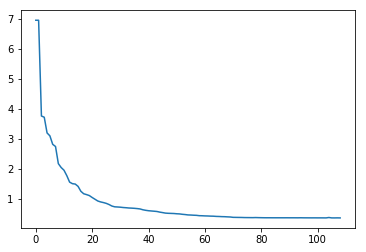

In [87]:
plt.plot(plt_data)
plt.show()

The above plot ought to show a pretty successful learning process.

In [83]:
plt_data = []

"""**************Neural Network Script Starts here********************************"""
print(len(train_data))
args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

# Train Neural Network using fmin_cg or minimize from scipy,optimize module. Check documentation for a working example

opts = {'maxiter': 50}  # Preferred value.

nn_params = minimize(nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)

# In Case you want to use fmin_cg, you may have to split the nnObjectFunction to two functions nnObjFunctionVal
# and nnObjGradient. Check documentation for this function before you proceed.
# nn_params, cost = fmin_cg(nnObjFunctionVal, initialWeights, nnObjGradient,args = args, maxiter = 50)

50000
grad_w2: [0.23445853 0.18834733 0.2339904  0.20015763 0.19229423 0.22866298
 0.25213872 0.25542311 0.21294986 0.17355268 0.21359762 0.1750504
 0.16679491 0.21521233 0.20080936 0.18526093 0.17804537 0.19711653
 0.17845883 0.19639524 0.1923428  0.21317407 0.20732935 0.22990608
 0.17138287 0.2048969  0.24058702 0.20490696 0.20099266 0.20444833
 0.24777267 0.19112752 0.21431092 0.19150699 0.2352363  0.18050193
 0.22597461 0.22812629 0.25029601 0.15526773 0.19093082 0.18258484
 0.18340826 0.17060214 0.22712499 0.19352825 0.20714373 0.21664405
 0.20432006 0.19353643 0.42012227]
grad_w1: [ 2.23482467e-05  4.56301044e-05  3.47973273e-05  2.39058002e-05
  4.25649467e-05  3.02146138e-05  2.55309881e-05  8.93985453e-06
  3.63817877e-06  4.79191472e-05  5.61636335e-05  7.41693333e-05
  3.65741752e-05  4.85490762e-05 -2.19407356e-05  1.14619780e-05
  4.26715068e-06  6.76798360e-05  3.53196944e-05  5.28375635e-05
  2.32462435e-05  1.42021492e-05  2.98829977e-05  2.08548990e-05
  1.96530509e-05

grad_w2: [0.23445853 0.18834733 0.2339904  0.20015763 0.19229423 0.22866298
 0.25213872 0.25542311 0.21294986 0.17355268 0.21359762 0.1750504
 0.16679491 0.21521233 0.20080936 0.18526093 0.17804537 0.19711653
 0.17845883 0.19639524 0.1923428  0.21317407 0.20732935 0.22990608
 0.17138287 0.2048969  0.24058702 0.20490696 0.20099266 0.20444833
 0.24777267 0.19112752 0.21431092 0.19150699 0.2352363  0.18050193
 0.22597461 0.22812629 0.25029601 0.15526773 0.19093082 0.18258484
 0.18340826 0.17060214 0.22712499 0.19352825 0.20714373 0.21664405
 0.20432006 0.19353643 0.42012227]
grad_w1: [ 2.23482467e-05  4.56301044e-05  3.47973273e-05  2.39058002e-05
  4.25649467e-05  3.02146138e-05  2.55309881e-05  8.93985453e-06
  3.63817877e-06  4.79191472e-05  5.61636335e-05  7.41693333e-05
  3.65741752e-05  4.85490762e-05 -2.19407356e-05  1.14619780e-05
  4.26715068e-06  6.76798360e-05  3.53196944e-05  5.28375635e-05
  2.32462435e-05  1.42021492e-05  2.98829977e-05  2.08548990e-05
  1.96530509e-05  3.97

grad_w2: [0.05654484 0.03505444 0.07044584 0.03462932 0.04746676 0.05827892
 0.07700262 0.06877182 0.04709303 0.03976624 0.06768424 0.04520533
 0.04354437 0.05423768 0.05062048 0.05318194 0.04845392 0.05441809
 0.03461453 0.0555578  0.05769829 0.05120896 0.05104483 0.05594054
 0.03922428 0.06550153 0.0658943  0.05471747 0.0693599  0.0657789
 0.06884579 0.04780814 0.06284863 0.0422959  0.04545719 0.05231698
 0.05849111 0.06243815 0.06802759 0.05112329 0.06013552 0.04343821
 0.04493443 0.05375802 0.05306112 0.0482386  0.04424491 0.05555613
 0.06420696 0.06106956 0.11192772]
grad_w1: [ 2.20214772e-05  4.45390203e-05  3.43747408e-05  2.38854801e-05
  4.25218703e-05  3.00793826e-05  2.41078492e-05  5.51353612e-06
 -1.60855545e-06  4.16106882e-05  4.20320562e-05  5.44272330e-05
  1.40800589e-05  2.56202058e-05 -4.61727809e-05 -8.65694183e-06
 -1.76728445e-05  4.84224540e-05  2.21342969e-05  4.24736117e-05
  1.52405969e-05  1.08486470e-05  2.83209822e-05  2.03190878e-05
  1.94862741e-05  3.96

grad_w2: [-0.04905601 -0.02955108 -0.04742509 -0.02574552 -0.05146418 -0.05371143
 -0.04500247 -0.04151746 -0.01754424 -0.02861922 -0.06414015 -0.01827629
 -0.04202017 -0.04725716 -0.0454979  -0.02595227 -0.03171552 -0.03434953
 -0.01817154 -0.052616   -0.04455561 -0.02067662 -0.0201913  -0.05314786
 -0.0141528  -0.05557771 -0.06138323 -0.04038643 -0.06337972 -0.05317889
 -0.01665368 -0.02687042 -0.04873409 -0.00721789 -0.02669138 -0.03390306
 -0.04913257 -0.05080963 -0.05922152 -0.0396396  -0.056727   -0.01315484
 -0.04593444 -0.05179591 -0.03389267 -0.01982896 -0.01267261 -0.03068312
 -0.05604076 -0.04681278 -0.06730404]
grad_w1: [ 2.22052269e-05  4.55208226e-05  3.49964797e-05  2.38979139e-05
  4.25337275e-05  3.01857141e-05  2.51155884e-05  8.01067292e-06
  2.48901533e-06  4.66787834e-05  5.30347185e-05  7.00843430e-05
  3.38833166e-05  4.69895106e-05 -2.29849005e-05  1.02806982e-05
  3.89313618e-06  6.55522280e-05  3.26419032e-05  5.02128685e-05
  2.13259977e-05  1.37145905e-05  2

grad_w2: [-0.0068473  -0.00635531  0.00098459 -0.00667533 -0.00968875 -0.00690539
  0.00588414  0.00021029  0.00325234 -0.00255124 -0.00991269  0.00476895
 -0.0065837  -0.00522146 -0.00606815  0.00531679  0.0003471   0.00315332
 -0.00197286 -0.00681256 -0.00209737  0.00428408  0.005579   -0.00853208
  0.00339112 -0.00332526 -0.00961795 -0.00171681 -0.00859395 -0.00115798
  0.01343354  0.00266563 -0.00284605  0.0070116  -0.00366143 -0.0004597
 -0.00565651 -0.00431935 -0.00840266  0.00153024 -0.00549046  0.00652219
 -0.00939384 -0.00589281 -0.00146266  0.00542033  0.00449362  0.0006745
 -0.00409599  0.00047661 -0.00280501]
grad_w1: [ 2.20938629e-05  4.49568153e-05  3.46527505e-05  2.38909143e-05
  4.25276816e-05  3.01287968e-05  2.45363414e-05  6.59300298e-06
  2.61667745e-07  4.40146649e-05  4.71976230e-05  6.16294289e-05
  2.31799935e-05  3.53646921e-05 -3.56663125e-05 -1.08366480e-07
 -7.92353200e-06  5.63170274e-05  2.69856478e-05  4.59395935e-05
  1.79610618e-05  1.21586862e-05  2.8

grad_w2: [-4.68894306e-03 -8.66994136e-03  2.81839905e-03 -6.08379027e-03
 -8.77897900e-03 -2.60539262e-03  6.96978832e-03 -7.13525440e-04
  1.44461967e-03 -1.16889141e-03 -6.53265992e-03  5.01118639e-03
 -7.55562040e-03 -5.07994269e-03 -8.22472076e-03  1.02601149e-02
  1.93626428e-03  7.04829127e-03 -2.49103708e-05 -3.93549622e-03
  3.98459289e-03  5.84261903e-03  8.95016409e-03 -5.13689611e-03
  3.22809347e-03 -1.32067606e-03 -8.49430048e-03 -5.10137937e-03
 -4.31118188e-03 -9.86892644e-04  1.67730721e-02  2.88220232e-03
 -1.48282423e-03  9.65748018e-03 -4.71491649e-03  5.32658282e-03
 -3.61940989e-03 -2.52826884e-03 -3.94978232e-03  6.10071954e-03
 -4.92850042e-03  6.29335800e-03 -5.71305895e-03 -3.04417718e-03
  4.52076934e-03  5.98796541e-03  4.48545631e-03  6.47694767e-03
 -1.33345840e-03  3.22241691e-03  6.08973755e-04]
grad_w1: [ 2.21049872e-05  4.49943450e-05  3.46433999e-05  2.38765126e-05
  4.25032228e-05  3.01173531e-05  2.45964276e-05  6.77720495e-06
  6.49884222e-07  4.44

grad_w2: [ 0.00651672 -0.00956446  0.01286176 -0.00082269 -0.00025647  0.01748123
  0.01469441  0.00122277 -0.00090291  0.00709583  0.01210728  0.00724434
 -0.00565084 -0.00042225 -0.00508018  0.02290075  0.00918172  0.02315317
  0.0072538   0.0111704   0.02389739  0.01562422  0.01993937  0.01203282
  0.00460508  0.01199852  0.00285875 -0.00854647  0.01726483  0.006472
  0.03069139  0.0077047   0.00867127  0.01755392 -0.0041546   0.02184601
  0.00729773  0.00923311  0.01756349  0.02342856  0.0036076   0.00757723
  0.00946401  0.01093785  0.02223012  0.01034205  0.00741296  0.02164486
  0.01291766  0.01604157  0.02055411]
grad_w1: [ 2.21354601e-05  4.51196740e-05  3.46125846e-05  2.38191807e-05
  4.24018543e-05  3.00586434e-05  2.46376940e-05  7.04560196e-06
  1.80960863e-06  4.60945312e-05  5.17468430e-05  6.68672452e-05
  2.78115565e-05  3.92504786e-05 -3.04945059e-05  4.91121773e-06
 -1.59947787e-06  6.18733060e-05  3.09494654e-05  4.95310313e-05
  2.08074417e-05  1.32878865e-05  2.9

grad_w2: [0.01929766 0.00433392 0.02462627 0.0076191  0.01329065 0.03818186
 0.02472791 0.01046731 0.00697623 0.0186386  0.03568431 0.0101335
 0.00401821 0.00778203 0.01249104 0.02533157 0.01547604 0.03737791
 0.01241257 0.0295219  0.03003139 0.03048398 0.02637574 0.0322065
 0.00842336 0.03138079 0.02143945 0.00244274 0.04199466 0.02183047
 0.04474454 0.01712935 0.02410276 0.02193224 0.00342266 0.02682766
 0.01926179 0.02582937 0.04164474 0.03695866 0.01910676 0.0118602
 0.02157638 0.02572426 0.02803932 0.01654044 0.01534212 0.02408393
 0.02858124 0.02836249 0.04686762]
grad_w1: [ 2.21224315e-05  4.51692725e-05  3.45938913e-05  2.37567490e-05
  4.22842562e-05  2.99710425e-05  2.43640795e-05  6.61214702e-06
  2.34167552e-06  4.71513204e-05  5.38553824e-05  6.85393211e-05
  2.83218819e-05  3.91385760e-05 -2.91154238e-05  7.22302422e-06
  2.05881592e-06  6.44998606e-05  3.27227300e-05  5.17966317e-05
  2.28540947e-05  1.40880379e-05  2.94237311e-05  2.04634447e-05
  1.94270522e-05  3.9494

grad_w2: [ 0.01392611  0.01158988  0.01704609  0.00053797  0.0087872   0.0326306
  0.01383611  0.00620481  0.00712537  0.01300478  0.03023616  0.00193932
  0.0007355  -0.00405592  0.00907948  0.01020477  0.00879979  0.02702568
  0.005938    0.02677479  0.0138784   0.02458122  0.01649474  0.02939147
  0.00120881  0.02693375  0.01746605  0.00608638  0.03918037  0.01424399
  0.03271798  0.00572543  0.02020799  0.01350689  0.00034669  0.01381204
  0.00921201  0.02052159  0.03708391  0.03624591  0.01462152  0.00375937
  0.01929832  0.01969522  0.01426853  0.00765536  0.01096825  0.01131606
  0.01518742  0.02047593  0.03605145]
grad_w1: [ 2.16929505e-05  4.39894157e-05  3.40472401e-05  2.35704340e-05
  4.19488838e-05  2.96639426e-05  2.33872805e-05  4.66979783e-06
 -1.60453205e-07  4.37941925e-05  4.58930489e-05  5.69062262e-05
  1.50433578e-05  2.59448208e-05 -4.03971489e-05 -6.40128317e-07
 -7.09108005e-06  5.39951753e-05  2.50433584e-05  4.62625872e-05
  1.90989021e-05  1.25713757e-05  2.

grad_w2: [ 0.00026279 -0.0181643  -0.00138483 -0.0134585  -0.01529671  0.01099532
 -0.00986904 -0.01744823 -0.01817101 -0.00280568 -0.00265258 -0.0083391
 -0.02150155 -0.02087268 -0.01961672  0.00570533 -0.000625    0.00999856
  0.00224083  0.00426427  0.00760957  0.00532644  0.00840802  0.00295246
 -0.01156098 -0.00570548 -0.0134327  -0.01995573  0.0108456  -0.01467948
  0.0175982  -0.01685212 -0.00569709  0.00693276 -0.02134246  0.00927695
 -0.00219858 -0.00699648  0.01201644  0.01918157 -0.01534675 -0.00978351
  0.00894567  0.00580847  0.00842475 -0.0025905  -0.00338471  0.00650668
  0.0001858   0.00118798 -0.0033392 ]
grad_w1: [ 2.16109734e-05  4.35012623e-05  3.36809973e-05  2.35418828e-05
  4.19199336e-05  2.96336205e-05  2.32875869e-05  4.39668295e-06
 -1.43060091e-06  4.19906486e-05  4.22908900e-05  5.29184142e-05
  1.18057901e-05  2.28460167e-05 -4.44500477e-05 -4.46072371e-06
 -1.33830460e-05  4.89846249e-05  2.20935969e-05  4.33464310e-05
  1.67222665e-05  1.16241301e-05  2.

grad_w2: [-7.00710504e-04 -1.61401812e-02 -4.22711244e-04 -1.24713682e-02
 -1.22302172e-02  1.16216898e-02 -7.30872961e-03 -1.42899897e-02
 -1.44124121e-02 -2.32381438e-03 -7.38006954e-04 -7.79812551e-03
 -1.85513743e-02 -1.80167249e-02 -1.66826914e-02  5.08152305e-03
  1.55398203e-05  1.01044800e-02  2.29271627e-03  4.59116238e-03
  6.57740478e-03  6.53733777e-03  7.76060076e-03  4.11810226e-03
 -1.09677485e-02 -3.84109295e-03 -1.14487096e-02 -1.68433629e-02
  1.20975369e-02 -1.20739955e-02  1.70354885e-02 -1.35232250e-02
 -3.74304520e-03  6.02512976e-03 -1.80451858e-02  1.02318832e-02
 -2.36918154e-03 -4.82843660e-03  1.27707450e-02  1.78801262e-02
 -1.36447334e-02 -8.50796699e-03  8.42083392e-03  5.74066802e-03
  8.08832030e-03 -1.21771687e-03 -2.45345373e-03  5.76625135e-03
  9.59151965e-04  3.12359121e-03 -1.02616712e-03]
grad_w1: [ 2.15946931e-05  4.33460461e-05  3.35168498e-05  2.35168969e-05
  4.18862796e-05  2.96108603e-05  2.32410261e-05  4.34847923e-06
 -1.41458989e-06  4.22

grad_w2: [ 7.23117629e-04 -5.59615707e-03  4.31683089e-03 -3.21669398e-03
  2.39393746e-04  1.33699309e-02  2.36267826e-03 -9.65525086e-04
  4.47045856e-04  1.54683111e-03  7.99851144e-03 -1.42031113e-03
 -7.31009683e-03 -5.80241458e-03 -4.20332992e-03  3.48534656e-03
  4.60838043e-03  1.02023856e-02  2.87520285e-03  7.45376142e-03
  3.89012639e-03  8.88532189e-03  6.34701269e-03  8.96132938e-03
 -3.08637155e-03  3.63905860e-03 -2.51061276e-03 -4.03764151e-03
  1.37983916e-02 -9.49877666e-04  1.64308555e-02 -4.96836539e-04
  4.09847905e-03  3.69428526e-03 -5.18619161e-03  1.43351478e-02
  1.65515789e-03  4.27126517e-03  1.42535088e-02  1.43158480e-02
 -4.39083162e-03  2.58662264e-05  7.46189576e-03  7.37621859e-03
  7.34808530e-03  3.06441329e-03  3.23733014e-03  3.79752270e-03
  4.00227855e-03  8.73311912e-03  9.93628862e-03]
grad_w1: [ 2.15568999e-05  4.33210133e-05  3.34567166e-05  2.34418053e-05
  4.17503640e-05  2.95122033e-05  2.28545442e-05  3.76913972e-06
 -1.32449585e-06  4.29

grad_w2: [-0.00182534 -0.00468503  0.00118215 -0.00287515 -0.00183237  0.00790449
  0.00058828 -0.0018969  -0.00111248 -0.00149778  0.00316418 -0.00207459
 -0.00613725 -0.00491791 -0.00489036  0.00203385  0.00235643  0.00595326
  0.00213761  0.00241763  0.00210638  0.00518819  0.00400314  0.00329891
 -0.00271196 -0.00032866 -0.00458907 -0.00513197  0.00769328 -0.00231257
  0.01005121  0.00112147  0.00043344  0.00181319 -0.00443948  0.01219604
 -0.00082434  0.00074484  0.00852267  0.00827102 -0.00423957 -0.00030959
  0.00441301  0.0035276   0.0051504   0.00218438  0.00092092  0.00216176
  0.00168971  0.00589241  0.00392116]
grad_w1: [ 2.18980657e-05  4.49407531e-05  3.42944957e-05  2.33988692e-05
  4.16498096e-05  2.95562398e-05  2.32810110e-05  5.03862671e-06
  2.04595303e-06  4.71145536e-05  5.48206541e-05  7.10460323e-05
  3.32592893e-05  4.38783543e-05 -2.46636253e-05  7.33280297e-06
  8.43338287e-07  6.39722199e-05  3.26450558e-05  5.27069977e-05
  2.52711448e-05  1.54137033e-05  2

grad_w2: [-0.0020601  -0.00469102  0.00122194 -0.00302388 -0.00175816  0.00756749
  0.0005289  -0.00191524 -0.00110792 -0.00143438  0.00299444 -0.00208412
 -0.00592719 -0.00481844 -0.00470781  0.00183707  0.00218136  0.00571595
  0.00206902  0.00218294  0.00193795  0.00504264  0.00378633  0.00295001
 -0.00284526 -0.00065519 -0.00426166 -0.0044786   0.00753592 -0.00218283
  0.00954912  0.00049446  0.00033087  0.00162652 -0.00398826  0.01143199
 -0.00106233  0.00059262  0.00828008  0.00808888 -0.00412871 -0.00035489
  0.00429399  0.00350324  0.00467658  0.00208448  0.00093786  0.0019451
  0.00159449  0.00573013  0.0036962 ]
grad_w1: [ 2.17874889e-05  4.45897363e-05  3.41431303e-05  2.33749421e-05
  4.16044376e-05  2.94923685e-05  2.30117883e-05  4.47186789e-06
  1.44524611e-06  4.65202907e-05  5.28610399e-05  6.73864570e-05
  2.85873494e-05  3.89365319e-05 -2.91565191e-05  3.55277293e-06
 -3.90971062e-06  6.03231165e-05  3.04884800e-05  5.13064999e-05
  2.43778599e-05  1.51893689e-05  2.

grad_w2: [-2.26903675e-03 -4.73558886e-03  1.22392235e-03 -3.19277978e-03
 -1.76044075e-03  7.31577466e-03  4.42118741e-04 -1.99620355e-03
 -1.17175586e-03 -1.39216864e-03  2.80664231e-03 -2.15394951e-03
 -5.82271270e-03 -4.80153333e-03 -4.65096454e-03  1.70010363e-03
  2.01330999e-03  5.50935463e-03  2.01295683e-03  1.96586148e-03
  1.81995208e-03  4.92746830e-03  3.62938045e-03  2.66440401e-03
 -2.99363675e-03 -8.53046728e-04 -4.06973228e-03 -4.08214753e-03
  7.37027445e-03 -2.14388229e-03  9.15560713e-03 -4.07763931e-05
  2.03890429e-04  1.49679769e-03 -3.71236252e-03  1.08487773e-02
 -1.25208706e-03  4.28998268e-04  8.07295616e-03  7.92381738e-03
 -4.06010162e-03 -4.41213196e-04  4.20560040e-03  3.44574476e-03
  4.34151722e-03  1.99908844e-03  9.07078650e-04  1.79417000e-03
  1.51342398e-03  5.55367220e-03  3.46081008e-03]
grad_w1: [ 2.17006076e-05  4.43030852e-05  3.40124901e-05  2.33558687e-05
  4.15690102e-05  2.94424428e-05  2.28303481e-05  4.09027979e-06
  9.27673183e-07  4.59

grad_w2: [ 0.00048123 -0.00267344  0.00345307 -0.00055447  0.00142635  0.00812559
  0.00248125  0.0012514   0.00232722  0.00043418  0.00592981  0.00036814
 -0.00368388 -0.00239775 -0.00131575  0.00161734  0.00384717  0.00611301
  0.00258945  0.00415587  0.00172285  0.00579177  0.00395161  0.0046014
 -0.00064117  0.00168886 -0.00097093 -0.0001497   0.00875973  0.0006566
  0.01030487  0.00045801  0.00272185  0.00149802 -0.00045667  0.01106577
  0.00148796  0.00302476  0.0095192   0.00904597 -0.00087758  0.0022317
  0.0049889   0.0053033   0.00421887  0.00247554  0.00352369  0.00172133
  0.00235504  0.00663973  0.0072595 ]
grad_w1: [ 2.15481699e-05  4.37276348e-05  3.36826831e-05  2.33065937e-05
  4.14857796e-05  2.93457644e-05  2.27098604e-05  3.88442602e-06
  3.96180792e-07  4.53797438e-05  4.95580126e-05  6.09079400e-05
  2.00099424e-05  2.97897704e-05 -3.70701440e-05 -3.02644333e-06
 -1.34215668e-05  5.24565468e-05  2.56677789e-05  4.75531526e-05
  2.15775812e-05  1.43650442e-05  2.82

grad_w2: [0.00777237 0.00766216 0.00950434 0.00748234 0.01299061 0.01065111
 0.00938467 0.01194281 0.01494897 0.00577248 0.01726178 0.00724862
 0.00323802 0.00689062 0.01091121 0.00140742 0.0090894  0.00941014
 0.00617911 0.01119081 0.00147255 0.01107906 0.00516272 0.01126712
 0.00530618 0.01240404 0.01030926 0.01499989 0.01339638 0.01159096
 0.01384704 0.00808529 0.01149674 0.00163486 0.01212758 0.00923988
 0.00889964 0.01308356 0.01706602 0.0126081  0.01455456 0.01018205
 0.00762955 0.01075338 0.00362803 0.00430398 0.01436258 0.0015965
 0.00707058 0.01251368 0.02120099]
grad_w1: [ 2.11247464e-05  4.16013375e-05  3.21047401e-05  2.30987138e-05
  4.11962122e-05  2.90970834e-05  2.26476099e-05  3.80679767e-06
 -2.23052387e-06  4.09090623e-05  4.11049840e-05  5.11592297e-05
  8.79829753e-06  1.75622928e-05 -4.85790926e-05 -8.55592215e-06
 -2.38924374e-05  3.97963081e-05  1.72399019e-05  3.87788244e-05
  1.35893370e-05  1.07560517e-05  2.70847232e-05  1.95370120e-05
  1.88270703e-05  3.84

grad_w2: [-9.42635438e-04 -4.03660183e-03  2.96304323e-03 -3.38223210e-03
 -8.22585328e-04  4.73548120e-03 -1.70288011e-04 -2.21593564e-04
  4.82048934e-04 -1.81270786e-03  2.70612424e-03 -9.75051949e-04
 -4.03543255e-03 -3.86447167e-03 -1.76694575e-03  6.77126476e-04
  9.96576707e-04  2.84632414e-03  2.75351372e-03  7.84358562e-04
  7.14653448e-04  3.79918184e-03  2.42298813e-03  3.75620980e-04
 -2.63548717e-03 -6.18473812e-04 -2.42197167e-03 -1.07591286e-04
  6.02662193e-03 -9.76962137e-04  7.45228185e-03 -3.59204585e-03
  1.18320155e-04  8.42447507e-04 -7.96331479e-04  4.95657581e-03
 -9.57794337e-05  6.00617149e-04  7.94204533e-03  6.13436924e-03
 -1.97958388e-05  8.44025416e-05  4.07535440e-03  4.44414463e-03
  1.90221354e-03  1.59902533e-03  2.55021007e-03  8.38918507e-04
 -3.57609593e-04  3.86333508e-03  3.37028820e-03]
grad_w1: [ 2.11405311e-05  4.20458298e-05  3.24679251e-05  2.30595742e-05
  4.10969052e-05  2.90370657e-05  2.27295325e-05  4.20464600e-06
 -5.28342343e-07  4.36

grad_w2: [-2.88938134e-03 -6.42173613e-03  1.63908432e-03 -5.23369240e-03
 -3.47897420e-03  3.49379622e-03 -1.83221600e-03 -2.50784457e-03
 -2.32544567e-03 -3.36252329e-03 -2.32121885e-04 -2.48968617e-03
 -5.30849587e-03 -5.74074921e-03 -4.26939512e-03  5.39805701e-04
 -4.72820728e-04  1.51593365e-03  1.81413133e-03 -1.41094490e-03
  5.60708135e-04  2.32029445e-03  1.75924007e-03 -1.81120248e-03
 -4.03657138e-03 -3.33270670e-03 -4.98128045e-03 -3.12477882e-03
  4.49826507e-03 -3.27797131e-03  5.97555665e-03 -5.85053817e-03
 -2.09568565e-03  6.80408917e-04 -3.24839007e-03  4.28368111e-03
 -1.70129224e-03 -1.94711362e-03  5.73911015e-03  4.63200659e-03
 -3.16130349e-03 -1.91232097e-03  3.22906027e-03  3.12140084e-03
  1.57428932e-03  1.04149411e-03 -5.94428107e-05  6.72211379e-04
 -1.73365998e-03  2.32870557e-03 -2.47703394e-04]
grad_w1: [ 2.11249442e-05  4.21260840e-05  3.25592954e-05  2.30424182e-05
  4.10567987e-05  2.90070109e-05  2.26718850e-05  4.14616608e-06
 -3.89318850e-07  4.39

grad_w2: [-7.93114029e-03 -1.13975333e-02 -1.36211138e-03 -9.41309876e-03
 -9.08192151e-03  9.69224954e-04 -5.06634563e-03 -7.81482716e-03
 -8.39176436e-03 -7.08325465e-03 -6.65747868e-03 -6.44807290e-03
 -8.26315540e-03 -9.33346087e-03 -1.01441751e-02  2.43798495e-04
 -3.67590571e-03 -1.23456903e-03 -2.04825320e-04 -6.19130417e-03
  2.37118901e-04 -1.76075299e-04  8.31981742e-05 -6.54807029e-03
 -7.59138509e-03 -9.24639982e-03 -1.05372932e-02 -9.50846507e-03
  1.34645715e-03 -7.73298072e-03  2.05893585e-03 -1.07107431e-02
 -6.47363862e-03  3.29189687e-04 -8.82044815e-03  2.61108086e-03
 -5.10622885e-03 -7.18540512e-03  9.45617332e-04  1.08227313e-03
 -1.00546416e-02 -6.81973388e-03  1.24046679e-03  1.93447730e-04
  8.68670645e-04 -1.45064986e-04 -5.72805654e-03  3.15214770e-04
 -4.13722350e-03 -7.22712830e-04 -8.35621139e-03]
grad_w1: [ 2.10884966e-05  4.23664753e-05  3.28261991e-05  2.30013513e-05
  4.09569734e-05  2.89318112e-05  2.25077807e-05  3.96153350e-06
 -1.06185608e-08  4.47

grad_w2: [-9.19583139e-03 -1.08858885e-02 -2.12479544e-03 -9.10968477e-03
 -9.24289486e-03  3.17844398e-04 -4.90696401e-03 -8.45037543e-03
 -8.69375933e-03 -7.65975933e-03 -7.31177866e-03 -6.94264505e-03
 -8.01489604e-03 -8.35284027e-03 -1.03157613e-02  1.24313029e-04
 -4.12021047e-03 -1.24496473e-03 -5.43988265e-04 -6.69601334e-03
  8.71052749e-05 -1.78057884e-04 -4.58201779e-04 -7.16000405e-03
 -8.47034919e-03 -9.75064084e-03 -1.06589948e-02 -9.48959015e-03
  3.57831891e-04 -7.28401621e-03  2.80681274e-04 -1.01775513e-02
 -6.65229767e-03  1.67576664e-04 -9.06273440e-03  1.80407751e-03
 -4.91804279e-03 -7.47469328e-03 -1.29692726e-05 -2.24455238e-04
 -1.04589408e-02 -7.28648280e-03  4.76761234e-04 -4.56491533e-04
  6.22411180e-04 -1.96951405e-04 -6.23671720e-03  1.50671738e-04
 -3.65034084e-03 -6.49895097e-04 -9.36450888e-03]
grad_w1: [ 2.10526436e-05  4.27180054e-05  3.31800782e-05  2.29433336e-05
  4.08193115e-05  2.88318866e-05  2.23058225e-05  3.73999238e-06
  3.25601015e-07  4.54

grad_w2: [-1.28394217e-02 -1.08918156e-02 -4.44298558e-03 -1.02695096e-02
 -1.11310734e-02 -9.10105423e-04 -5.43901143e-03 -1.15705563e-02
 -1.10536609e-02 -1.01463567e-02 -1.00688008e-02 -9.46022638e-03
 -9.15552295e-03 -7.62100311e-03 -1.27637154e-02 -9.73768510e-05
 -6.21499422e-03 -1.39381707e-03 -1.53596442e-03 -8.80977491e-03
 -1.47470736e-04 -2.95140147e-04 -1.71699644e-03 -9.33366313e-03
 -1.14306165e-02 -1.19806905e-02 -1.27000773e-02 -1.03498344e-02
 -1.62133457e-03 -7.55260033e-03 -4.39723928e-03 -1.03024463e-02
 -7.85864125e-03 -1.00335770e-04 -1.16517402e-02 -1.35087460e-03
 -5.51497697e-03 -9.31930890e-03 -2.11769542e-03 -2.93783659e-03
 -1.23196991e-02 -1.01493880e-02 -1.50295040e-03 -2.25626277e-03
  1.61269261e-04 -4.85456647e-04 -8.14239383e-03 -1.27055037e-04
 -3.29914953e-03 -9.90076269e-04 -1.30260324e-02]
grad_w1: [ 2.10110063e-05  4.32779000e-05  3.36549310e-05  2.28174057e-05
  4.05487927e-05  2.86482336e-05  2.19189589e-05  3.23426490e-06
  1.00042071e-06  4.67

grad_w2: [-5.97556544e-03 -5.40002859e-03 -9.47336655e-04 -4.68741485e-03
 -5.07920610e-03  6.86972391e-04 -2.21459525e-03 -4.85369916e-03
 -4.36340484e-03 -4.92324805e-03 -3.58674969e-03 -4.02962129e-03
 -4.47977705e-03 -3.18415489e-03 -5.52463231e-03  4.32077504e-05
 -2.23974648e-03  4.14576501e-04  4.77542131e-04 -3.91558967e-03
 -4.64825221e-05  6.91936483e-04  3.32596017e-05 -4.69359929e-03
 -5.49330076e-03 -6.18589512e-03 -6.30975021e-03 -4.06801418e-03
  6.21917734e-04 -2.78520014e-03 -4.31307914e-05 -4.76109043e-03
 -3.71109755e-03  2.46714326e-05 -4.78116188e-03  6.78324950e-04
 -1.56970615e-03 -4.03892560e-03  1.35571616e-03 -3.24245325e-04
 -5.36989104e-03 -3.68706216e-03  5.14846758e-04  5.59408069e-04
  6.92197686e-04  7.29328773e-04 -2.71154823e-03  4.39870116e-06
 -8.70097846e-04  1.26004268e-03 -4.86588576e-03]
grad_w1: [ 2.08956719e-05  4.30658054e-05  3.35887084e-05  2.27497252e-05
  4.04222670e-05  2.85475094e-05  2.16918610e-05  2.85622047e-06
  2.39876424e-07  4.55

grad_w2: [1.60857708e-03 1.03037000e-04 2.48042056e-03 1.48973622e-03
 1.74104249e-03 2.71486855e-03 1.02279422e-03 2.48761424e-03
 3.07191189e-03 9.20954356e-04 3.55313230e-03 2.17556566e-03
 7.17486915e-05 1.41675659e-03 2.30096917e-03 1.88596324e-04
 2.29054360e-03 2.60908539e-03 2.56126433e-03 1.35420091e-03
 4.14320415e-05 1.64950211e-03 1.98487925e-03 1.15163967e-03
 1.46397342e-03 1.77644636e-04 9.07294763e-04 2.45177855e-03
 3.06277037e-03 2.26769057e-03 5.22724741e-03 1.16551061e-03
 6.86213649e-04 1.30082573e-04 2.66665158e-03 3.50720910e-03
 2.61565295e-03 2.11465010e-03 5.01179090e-03 2.65496439e-03
 1.97643926e-03 3.32682068e-03 2.48185502e-03 3.74238958e-03
 1.38052334e-03 2.17650341e-03 2.85666979e-03 1.30985559e-04
 1.92228678e-03 3.79497832e-03 4.19572595e-03]
grad_w1: [ 2.07632573e-05  4.28228042e-05  3.35121548e-05  2.26713671e-05
  4.02763395e-05  2.84325965e-05  2.14305320e-05  2.42870323e-06
 -5.80013702e-07  4.42643194e-05  4.78158282e-05  5.79531659e-05
  1.7215

grad_w2: [2.48061345e-03 8.26541128e-04 2.95583696e-03 2.26706432e-03
 2.72220332e-03 2.90506391e-03 1.42079547e-03 3.53424579e-03
 4.15088487e-03 1.70731418e-03 4.47438909e-03 3.03820798e-03
 6.12019282e-04 2.00915141e-03 3.36876538e-03 1.91292155e-04
 2.79596496e-03 2.84390992e-03 2.71168754e-03 2.03481605e-03
 5.10182158e-05 1.76133394e-03 2.17998148e-03 1.96239634e-03
 2.28149568e-03 1.08676618e-03 1.85722703e-03 3.43512165e-03
 3.30995317e-03 3.00048131e-03 5.90006680e-03 1.94172529e-03
 1.26578938e-03 1.34538209e-04 3.67115597e-03 3.76678058e-03
 3.05311452e-03 2.88763304e-03 5.44300323e-03 3.04815101e-03
 2.94953615e-03 4.23589478e-03 2.68380845e-03 4.10613467e-03
 1.39851067e-03 2.30501983e-03 3.56033565e-03 1.49276366e-04
 2.17837073e-03 4.12767730e-03 5.41324419e-03]
grad_w1: [ 2.07230860e-05  4.27166528e-05  3.34409098e-05  2.26386307e-05
  4.02197709e-05  2.83938688e-05  2.15028322e-05  2.66836946e-06
 -3.55732384e-07  4.44295281e-05  4.84559994e-05  5.83345838e-05
  1.6940

grad_w2: [4.20354554e-03 2.43473522e-03 3.88732397e-03 3.88783775e-03
 4.86037914e-03 3.30138534e-03 2.17005224e-03 5.76049181e-03
 6.52829099e-03 3.42992682e-03 6.41306348e-03 4.85096627e-03
 1.61443337e-03 3.34705095e-03 5.65531355e-03 1.95278301e-04
 3.77396828e-03 3.41480108e-03 2.98451461e-03 3.55460839e-03
 7.46095866e-05 2.04864077e-03 2.63029963e-03 3.75896770e-03
 3.90210226e-03 3.04283786e-03 3.87155784e-03 5.66269722e-03
 3.69487079e-03 4.62832493e-03 7.26353863e-03 3.55973724e-03
 2.66081346e-03 1.43984061e-04 5.77404347e-03 4.16065287e-03
 3.99094934e-03 4.50801176e-03 6.43129210e-03 3.89078751e-03
 5.00623470e-03 6.13029336e-03 3.02583960e-03 4.80763264e-03
 1.43014551e-03 2.58521810e-03 5.03633935e-03 1.96849897e-04
 2.77158600e-03 4.90871380e-03 8.09979642e-03]
grad_w1: [ 2.06362212e-05  4.24768931e-05  3.32620603e-05  2.25589792e-05
  4.00835325e-05  2.83030155e-05  2.16625975e-05  3.20584769e-06
  2.19247046e-07  4.46193104e-05  4.95509776e-05  5.92153783e-05
  1.6313

grad_w2: [3.22661804e-03 1.85353998e-03 3.45259738e-03 3.16687191e-03
 4.17202462e-03 2.71575867e-03 1.77495906e-03 5.04185518e-03
 5.84095402e-03 2.81860508e-03 5.56781646e-03 4.11330842e-03
 1.20058985e-03 2.98907678e-03 4.92404064e-03 1.30176652e-04
 3.14528707e-03 2.94418064e-03 2.56851117e-03 3.09839136e-03
 4.59623442e-05 1.82659985e-03 2.22621894e-03 3.03994223e-03
 2.89722331e-03 2.45374866e-03 3.22175678e-03 5.16193921e-03
 3.18619206e-03 4.15023672e-03 6.26523268e-03 2.88474118e-03
 2.25646145e-03 8.20732744e-05 5.02033684e-03 3.35709506e-03
 3.47301288e-03 3.79472543e-03 5.89595791e-03 3.35740034e-03
 4.29122654e-03 5.34317754e-03 2.60207904e-03 4.27084173e-03
 1.14969045e-03 2.24744700e-03 4.42265585e-03 1.77304603e-04
 2.31326233e-03 4.48835447e-03 6.89759904e-03]
grad_w1: [ 2.05775731e-05  4.23152934e-05  3.31000334e-05  2.24792116e-05
  3.99472365e-05  2.82159308e-05  2.18320544e-05  3.73780590e-06
  7.38880460e-07  4.41789421e-05  4.93129056e-05  5.97230843e-05
  1.6069

grad_w2: [ 1.40613870e-03  2.12605922e-04  2.40616070e-03  1.31090644e-03
  2.18982108e-03  1.44559159e-03  8.38764825e-04  3.18392654e-03
  3.76709033e-03  1.13832419e-03  3.39557145e-03  2.28153428e-03
  2.16206165e-04  1.75055169e-03  3.08834331e-03 -9.44132418e-06
  1.63498268e-03  1.78312460e-03  1.65209818e-03  1.70334409e-03
 -1.61651885e-05  1.16749082e-03  1.20270187e-03  1.21855621e-03
  7.48912817e-04  9.41969594e-04  1.48530589e-03  3.35659868e-03
  2.07029733e-03  2.55827427e-03  4.00577261e-03  1.11903020e-03
  1.09658380e-03 -5.40691915e-05  3.07445294e-03  1.80638351e-03
  2.13643595e-03  1.94771628e-03  4.59920170e-03  2.17174021e-03
  2.44774453e-03  3.33615987e-03  1.71099546e-03  3.06783105e-03
  5.50485562e-04  1.42127735e-03  3.00890999e-03  1.36998636e-04
  1.09431513e-03  3.33317066e-03  3.91318939e-03]
grad_w1: [ 2.04092840e-05  4.18877724e-05  3.27158750e-05  2.22773280e-05
  3.95975530e-05  2.79807868e-05  2.19557288e-05  4.36542933e-06
  1.64191757e-06  4.24

grad_w2: [-1.51364792e-04 -1.89560457e-03  1.32054633e-03 -8.53383938e-04
 -4.62222214e-04  6.09219415e-04 -1.05359134e-04  7.18037201e-04
  8.47620003e-04 -1.08452689e-03  7.75811842e-04  5.72728125e-05
 -8.48935030e-04 -2.24322523e-04  5.67725446e-04 -1.04911486e-04
  6.30421812e-05  5.55238758e-04  9.18657406e-04 -5.43984529e-04
 -8.93514485e-05  4.67588944e-04  2.31436519e-04 -1.02262841e-03
 -1.20432134e-03 -1.16326094e-03 -8.65979404e-04  5.34267535e-04
  1.23414304e-03  1.64419332e-04  2.21617632e-03 -1.07036915e-03
 -1.10626008e-03 -1.44151230e-04  6.05432159e-04  9.16591245e-04
  6.31414019e-04 -3.07529747e-04  2.99217900e-03  1.01161068e-03
  1.56713086e-05  1.01427899e-03  1.10981951e-03  2.04900406e-03
  2.25576589e-04  7.67870892e-04  1.47169264e-03  3.97338352e-05
 -1.65456803e-04  1.89857872e-03  4.98605610e-04]
grad_w1: [ 2.03167058e-05  4.15447595e-05  3.24314574e-05  2.21905996e-05
  3.94555959e-05  2.78807779e-05  2.18923000e-05  4.29077069e-06
  9.06949480e-07  4.04

grad_w2: [-5.10233733e-04 -2.20689249e-03  1.14175509e-03 -1.23269515e-03
 -9.07348961e-04  5.10377389e-04 -2.57009435e-04  2.68138483e-04
  3.38539166e-04 -1.43839660e-03  3.04491616e-04 -3.48244317e-04
 -1.03234662e-03 -5.50956136e-04  6.73620557e-05 -1.20622714e-04
 -2.10872202e-04  3.49578078e-04  8.06425619e-04 -9.47287667e-04
 -1.07025399e-04  3.80117425e-04  9.28362874e-05 -1.38837784e-03
 -1.49674387e-03 -1.53968636e-03 -1.27938631e-03  4.63951236e-05
  1.09551778e-03 -2.18323264e-04  1.90800788e-03 -1.43491647e-03
 -1.51354307e-03 -1.59221789e-04  1.83135816e-04  7.90690855e-04
  3.59612492e-04 -7.02972893e-04  2.65084436e-03  7.99215679e-04
 -4.46516078e-04  6.08972386e-04  1.03246679e-03  1.86540077e-03
  1.94507835e-04  6.91544795e-04  1.16530761e-03  1.30132667e-05
 -3.71094944e-04  1.65690759e-03 -9.16403110e-05]
grad_w1: [ 2.03019152e-05  4.15093815e-05  3.24067054e-05  2.21770647e-05
  3.94318127e-05  2.78634412e-05  2.18657892e-05  4.25786364e-06
  7.54380429e-07  4.01

grad_w2: [-1.58752829e-03 -3.05560102e-03  6.55732740e-04 -2.34026742e-03
 -2.14676212e-03  2.36610309e-04 -6.88874110e-04 -9.81345622e-04
 -1.02784129e-03 -2.37452697e-03 -1.00356050e-03 -1.52896622e-03
 -1.55526818e-03 -1.44151193e-03 -1.34703495e-03 -1.60893326e-04
 -9.76948486e-04 -2.36960308e-04  5.08844269e-04 -2.03862026e-03
 -1.51179639e-04  1.42449903e-04 -2.62819631e-04 -2.41833289e-03
 -2.35137433e-03 -2.61006062e-03 -2.45510430e-03 -1.24358510e-03
  6.75200439e-04 -1.20065950e-03  1.02003344e-03 -2.48797024e-03
 -2.56683189e-03 -1.97838487e-04 -1.01074508e-03  4.54688676e-04
 -4.10809932e-04 -1.80402752e-03  1.71808305e-03  2.03719689e-04
 -1.78487327e-03 -5.19740273e-04  8.17520724e-04  1.31892607e-03
  1.10890769e-04  4.81691470e-04  2.95484477e-04 -5.50014365e-05
 -9.27561795e-04  1.01276080e-03 -1.73320650e-03]
grad_w1: [ 2.02606506e-05  4.14118402e-05  3.23400245e-05  2.21400354e-05
  3.93665866e-05  2.78156005e-05  2.17864717e-05  4.15587489e-06
  3.55327935e-07  3.95

grad_w2: [-1.78864797e-03 -2.86220388e-03  6.05231845e-04 -2.21831408e-03
 -2.02845644e-03  2.50188696e-04 -6.70436179e-04 -9.51627460e-04
 -9.38015790e-04 -2.24625011e-03 -9.59431185e-04 -1.41931492e-03
 -1.51553463e-03 -1.25766001e-03 -1.30697666e-03 -1.65618504e-04
 -9.17445130e-04 -1.25368488e-04  5.21233838e-04 -1.96713572e-03
 -1.60128178e-04  1.58396838e-04 -1.68417514e-04 -2.30997554e-03
 -2.24173802e-03 -2.53481026e-03 -2.33266175e-03 -1.03853209e-03
  6.52452575e-04 -1.00115781e-03  9.79072030e-04 -2.33112934e-03
 -2.44237859e-03 -2.02335906e-04 -9.63389628e-04  4.14262039e-04
 -3.83913427e-04 -1.71254543e-03  1.61916283e-03  1.66762278e-04
 -1.68825458e-03 -5.11295394e-04  8.16123678e-04  1.27256428e-03
  1.26583019e-04  5.15895494e-04  1.68641926e-04 -6.35306730e-05
 -8.45176475e-04  1.11933492e-03 -1.64969807e-03]
grad_w1: [ 2.02267964e-05  4.14384441e-05  3.23837450e-05  2.21019495e-05
  3.92908501e-05  2.77608475e-05  2.17103535e-05  4.10612569e-06
  3.76113376e-07  3.96

grad_w2: [-2.19876282e-03 -2.70240739e-03  4.49346168e-04 -2.20454128e-03
 -2.04445800e-03  2.43016543e-04 -7.11335599e-04 -1.10707009e-03
 -9.97685473e-04 -2.20222706e-03 -1.08135312e-03 -1.41525358e-03
 -1.54692213e-03 -1.11020132e-03 -1.44967526e-03 -1.75228154e-04
 -9.39492460e-04 -4.57722565e-06  5.09364099e-04 -2.02225692e-03
 -1.76141347e-04  1.57220816e-04 -6.93518047e-05 -2.30597999e-03
 -2.22055557e-03 -2.59319531e-03 -2.33947044e-03 -8.45668957e-04
  5.59756343e-04 -7.98366816e-04  8.03058577e-04 -2.24182829e-03
 -2.38925564e-03 -2.11276892e-04 -1.08498745e-03  3.10541278e-04
 -4.62572833e-04 -1.74353540e-03  1.36434017e-03  4.42969931e-05
 -1.74048788e-03 -6.75496414e-04  7.67390039e-04  1.09720184e-03
  1.48385828e-04  5.47129895e-04 -1.67142250e-04 -8.05846664e-05
 -8.01575686e-04  1.16355853e-03 -1.75423788e-03]
grad_w1: [ 2.01735697e-05  4.14841767e-05  3.24474689e-05  2.20363974e-05
  3.91615292e-05  2.76672998e-05  2.15653385e-05  3.99329134e-06
  5.24244334e-07  3.99

grad_w2: [-1.21398356e-03 -1.77582270e-03  8.28584305e-04 -1.11060546e-03
 -8.71813274e-04  5.00523926e-04 -2.88821758e-04 -1.21673876e-05
  1.84887413e-04 -1.27594873e-03  4.21620751e-05 -4.04154854e-04
 -1.00608298e-03 -1.74136496e-04 -2.20878640e-04 -1.53203112e-04
 -2.47484626e-04  5.06938423e-04  7.67631584e-04 -1.03717490e-03
 -1.56155160e-04  3.95928736e-04  2.23402529e-04 -1.35390704e-03
 -1.35351967e-03 -1.62866022e-03 -1.19916083e-03  2.64138006e-04
  9.08466944e-04  1.37123291e-04  1.50535510e-03 -1.22757175e-03
 -1.41797829e-03 -1.83358915e-04  2.34602461e-05  5.36400261e-04
  3.02106465e-04 -7.08041648e-04  1.97267403e-03  4.36811304e-04
 -5.05003121e-04  3.58683150e-04  9.80282938e-04  1.57187509e-03
  2.43952958e-04  7.75142075e-04  5.99588584e-04 -3.49617753e-05
 -1.75514486e-04  1.55917478e-03 -3.32564394e-04]
grad_w1: [ 2.01282795e-05  4.14321172e-05  3.24258382e-05  2.19922735e-05
  3.90797156e-05  2.76091760e-05  2.14932564e-05  3.91212733e-06
  3.85156816e-07  3.98

grad_w2: [ 7.27336010e-06 -7.19467421e-04  1.29328018e-03  1.57895534e-04
  5.06563315e-04  8.23421496e-04  2.04843664e-04  1.26102482e-03
  1.53691784e-03 -2.03144633e-04  1.30051948e-03  7.72481720e-04
 -3.73841159e-04  8.96531790e-04  1.21015791e-03 -1.25056788e-04
  5.38751405e-04  1.07153079e-03  1.07876797e-03  3.34353740e-05
 -1.31065973e-04  6.86173573e-04  5.58178467e-04 -2.77701162e-04
 -3.26160602e-04 -5.31761124e-04  1.29008475e-04  1.44279210e-03
  1.33111543e-03  1.13967767e-03  2.35398220e-03 -5.67872383e-05
 -3.64162780e-04 -1.45517074e-04  1.32696891e-03  8.09300822e-04
  1.17651751e-03  4.94115502e-04  2.68854063e-03  9.11114335e-04
  9.33726195e-04  1.56012929e-03  1.27247045e-03  2.12890701e-03
  3.71135337e-04  1.05367763e-03  1.52963959e-03  2.70057557e-05
  5.13952040e-04  1.94341897e-03  1.33288116e-03]
grad_w1: [ 2.00725180e-05  4.13608281e-05  3.23909363e-05  2.19374487e-05
  3.89788414e-05  2.75379344e-05  2.14074318e-05  3.81652770e-06
  2.25538814e-07  3.98

grad_w2: [ 8.22613973e-05 -6.10615424e-04  1.32320080e-03  2.06392770e-04
  5.59400890e-04  8.40803217e-04  2.43292983e-04  1.32348242e-03
  1.60020780e-03 -1.05962485e-04  1.34017490e-03  7.94684901e-04
 -3.20799858e-04  9.42107193e-04  1.26799798e-03 -1.27153231e-04
  5.71290109e-04  1.07193199e-03  1.06829219e-03  1.08592032e-04
 -1.29564267e-04  7.03358332e-04  5.74734475e-04 -2.02230919e-04
 -2.64536781e-04 -4.36543163e-04  1.97621433e-04  1.48626131e-03
  1.32791426e-03  1.18964046e-03  2.35871442e-03 -1.23633239e-05
 -2.68441557e-04 -1.46886405e-04  1.38812406e-03  8.07328827e-04
  1.20861965e-03  5.40475368e-04  2.66099985e-03  9.18163102e-04
  9.83112888e-04  1.60973459e-03  1.28916799e-03  2.10803162e-03
  3.69516309e-04  1.04296855e-03  1.57062637e-03  3.40877452e-05
  5.77898014e-04  1.90537469e-03  1.40211272e-03]
grad_w1: [ 2.00368212e-05  4.12755334e-05  3.23305733e-05  2.19043341e-05
  3.89209377e-05  2.74972231e-05  2.13746984e-05  3.78408894e-06
  4.79094853e-08  3.95

grad_w2: [ 2.64738554e-04 -3.33107360e-04  1.39504023e-03  3.20368297e-04
  6.86636940e-04  8.82045357e-04  3.35836072e-04  1.47018707e-03
  1.75033452e-03  1.41022469e-04  1.42482633e-03  8.37163239e-04
 -1.88659442e-04  1.04140053e-03  1.40218995e-03 -1.33138775e-04
  6.46681093e-04  1.06927222e-03  1.03413338e-03  3.01003370e-04
 -1.25598091e-04  7.45422872e-04  6.16152875e-04 -1.28902084e-05
 -1.13120582e-04 -1.89942224e-04  3.63379549e-04  1.58618816e-03
  1.31290615e-03  1.30572828e-03  2.35792217e-03  9.04112556e-05
 -2.41255330e-05 -1.50954106e-04  1.53053256e-03  7.99053823e-04
  1.28039504e-03  6.49939146e-04  2.57833694e-03  9.32711790e-04
  1.09625157e-03  1.72304893e-03  1.33030586e-03  2.03590518e-03
  3.64348248e-04  1.00695364e-03  1.66599792e-03  5.41795144e-05
  7.25165655e-04  1.79650081e-03  1.56647209e-03]
grad_w1: [ 1.99403219e-05  4.10427905e-05  3.21617396e-05  2.18126866e-05
  3.87608399e-05  2.73847642e-05  2.12894553e-05  3.70182388e-06
 -4.27511884e-07  3.88

grad_w2: [ 1.95504760e-04 -3.54001391e-04  1.34300372e-03  1.95985531e-04
  5.60075303e-04  8.26175718e-04  3.23492621e-04  1.35910615e-03
  1.62779907e-03  9.27325672e-05  1.28969011e-03  6.82529136e-04
 -2.10770248e-04  9.38723323e-04  1.28487608e-03 -1.46167410e-04
  5.80166999e-04  9.76460755e-04  9.71146462e-04  2.54426212e-04
 -1.30661243e-04  6.91840050e-04  5.71846865e-04 -6.35172566e-05
 -2.07474816e-04 -2.06856572e-04  2.76588678e-04  1.46378850e-03
  1.20436937e-03  1.18521831e-03  2.17666290e-03 -3.60972824e-05
 -5.81747664e-05 -1.63635931e-04  1.41179740e-03  7.49950687e-04
  1.16659067e-03  5.77177366e-04  2.41884912e-03  8.67327796e-04
  9.54581801e-04  1.59948398e-03  1.28348820e-03  1.90509318e-03
  3.20487810e-04  9.18939693e-04  1.57801635e-03  5.35261499e-05
  6.55273542e-04  1.65609533e-03  1.39083736e-03]
grad_w1: [ 1.98758479e-05  4.09037386e-05  3.20336360e-05  2.17312019e-05
  3.86169753e-05  2.72849164e-05  2.12632947e-05  3.77129095e-06
 -4.53750642e-07  3.84

grad_w2: [-5.40483419e-05 -4.68136955e-04  1.12685598e-03 -2.76191931e-04
  8.64981921e-05  6.20922210e-04  2.59299792e-04  9.00340274e-04
  1.09672450e-03 -1.41115449e-04  7.38374239e-04  8.16671969e-05
 -3.29903370e-04  5.11776293e-04  8.01686976e-04 -1.91648552e-04
  3.03492591e-04  6.16788350e-04  7.38226256e-04 -9.04819267e-07
 -1.48834347e-04  4.87029364e-04  3.72674563e-04 -2.85038734e-04
 -5.84561109e-04 -3.35123890e-04 -6.40202763e-05  9.39171888e-04
  7.83403737e-04  6.79010572e-04  1.47689587e-03 -5.27275823e-04
 -2.25529564e-04 -2.09774868e-04  9.30773646e-04  5.69096434e-04
  6.95657329e-04  2.71324449e-04  1.79909500e-03  6.07396763e-04
  3.78281884e-04  1.08494947e-03  1.09457627e-03  1.41774814e-03
  1.66246877e-04  5.99750510e-04  1.22827066e-03  5.19305517e-05
  3.89428247e-04  1.13609365e-03  6.90648774e-04]
grad_w1: [ 1.96054152e-05  4.03447312e-05  3.15486541e-05  2.14064062e-05
  3.80409371e-05  2.68822486e-05  2.10837789e-05  3.91190551e-06
 -5.40788804e-07  3.73

grad_w2: [ 1.73502986e-04 -3.84985861e-04  1.18061175e-03 -2.01941380e-04
  1.69039526e-04  6.06639276e-04  3.21444235e-04  1.03510968e-03
  1.19086348e-03 -2.80352026e-05  8.33090479e-04  2.72544995e-05
 -2.76231043e-04  5.14074103e-04  9.68631955e-04 -2.03825105e-04
  3.98473978e-04  5.31511502e-04  7.24297909e-04  1.66890813e-04
 -1.54936555e-04  4.60695350e-04  3.35452996e-04 -1.40956967e-04
 -5.54292236e-04 -1.43877115e-04  1.24671527e-04  9.75505501e-04
  7.22713361e-04  6.23157245e-04  1.45937812e-03 -6.07480348e-04
  2.00519900e-06 -2.22372347e-04  1.00971024e-03  5.76802070e-04
  7.45545573e-04  4.44701506e-04  1.83501454e-03  6.56537188e-04
  4.83015217e-04  1.15173676e-03  1.08980657e-03  1.39233620e-03
  1.30213957e-04  5.33605286e-04  1.36283369e-03  6.07680409e-05
  4.41362270e-04  1.08018393e-03  8.13541485e-04]
grad_w1: [ 1.94960111e-05  4.01075611e-05  3.13537339e-05  2.12829689e-05
  3.78226153e-05  2.67286596e-05  2.09949017e-05  3.92522454e-06
 -7.40552953e-07  3.68

grad_w2: [ 4.62556542e-04 -3.24434174e-04  1.22261794e-03 -1.66168803e-04
  2.04609791e-04  5.68852711e-04  3.85223276e-04  1.14695088e-03
  1.23277518e-03  6.87471033e-05  8.90327205e-04 -1.34331335e-04
 -2.53719824e-04  4.47375031e-04  1.12576216e-03 -2.21965090e-04
  4.98127091e-04  3.53249528e-04  6.89635891e-04  3.32849836e-04
 -1.64971144e-04  4.02873696e-04  2.44923665e-04  2.50194601e-06
 -5.81275375e-04  6.18845064e-05  3.27457052e-04  9.79046361e-04
  5.91953907e-04  4.69934466e-04  1.37153111e-03 -8.03009031e-04
  2.79397673e-04 -2.41492627e-04  1.03295485e-03  5.56147242e-04
  7.59374601e-04  6.34649476e-04  1.84153470e-03  7.04385958e-04
  5.41288035e-04  1.16059163e-03  1.05536599e-03  1.29547281e-03
  7.03217775e-05  4.12537230e-04  1.49277366e-03  7.34475557e-05
  4.89510840e-04  9.39755810e-04  8.86273187e-04]
grad_w1: [ 1.93139054e-05  3.97425387e-05  3.10634157e-05  2.10795235e-05
  3.74603617e-05  2.64734850e-05  2.08290898e-05  3.91588535e-06
 -1.27969233e-06  3.60

grad_w2: [ 5.89178665e-05 -7.15046056e-04  9.98007751e-04 -6.10628246e-04
 -3.26114197e-04  4.20189323e-04  2.19788026e-04  6.52704192e-04
  6.16371189e-04 -3.81242279e-04  3.55900867e-04 -5.98214187e-04
 -5.03656296e-04  3.36048249e-05  5.66289276e-04 -2.38894201e-04
  1.83250727e-04  9.80799534e-05  5.51111268e-04 -1.54695610e-04
 -1.84144428e-04  2.60791550e-04  4.13887110e-05 -4.06944402e-04
 -9.93919217e-04 -3.77873705e-04 -1.44925410e-04  4.08560369e-04
  3.74043083e-04  3.85063318e-05  9.39191523e-04 -1.22605836e-03
 -1.24542335e-04 -2.61601607e-04  5.24371715e-04  4.24707930e-04
  3.89673233e-04  1.43499245e-04  1.45457573e-03  4.51569621e-04
 -4.88334363e-05  6.47310720e-04  9.08725988e-04  1.05786661e-03
  9.23067767e-06  2.82816928e-04  1.12558185e-03  3.63113675e-05
  2.52145655e-04  7.00437428e-04  1.83545800e-04]
grad_w1: [ 1.92309244e-05  3.95942017e-05  3.09499388e-05  2.09868958e-05
  3.72939886e-05  2.63560926e-05  2.07404175e-05  3.90944598e-06
 -1.22597926e-06  3.59

grad_w2: [-6.04086079e-04 -1.37418940e-03  6.46154728e-04 -1.31955565e-03
 -1.21158422e-03  1.64117501e-04 -6.53451822e-05 -1.32741627e-04
 -3.88959317e-04 -1.13590435e-03 -5.36314280e-04 -1.34435410e-03
 -9.04113377e-04 -6.35066886e-04 -3.42217348e-04 -2.62876999e-04
 -3.25262120e-04 -3.41524352e-04  3.38755113e-04 -9.94024982e-04
 -2.11995684e-04  3.10104163e-05 -2.99048949e-04 -1.12982963e-03
 -1.64007812e-03 -1.13016435e-03 -9.27855819e-04 -5.32627202e-04
  2.54881396e-05 -6.69935315e-04  2.73329360e-04 -1.92252460e-03
 -8.22955647e-04 -2.89986228e-04 -2.97626628e-04  2.22210974e-04
 -2.13078474e-04 -6.67510610e-04  8.42398548e-04  2.66705221e-05
 -1.01224163e-03 -2.02625930e-04  6.79850065e-04  7.04676739e-04
 -8.39326544e-05  6.64144941e-05  5.57825994e-04 -2.33274017e-05
 -1.44581305e-04  3.10353792e-04 -9.62111758e-04]
grad_w1: [ 1.90840218e-05  3.93288178e-05  3.07467651e-05  2.08232932e-05
  3.70003472e-05  2.61488855e-05  2.05833871e-05  3.89573714e-06
 -1.15816779e-06  3.57

grad_w2: [-9.34149966e-04 -1.56158581e-03  4.69940270e-04 -1.58662471e-03
 -1.55225480e-03  7.55795585e-05 -1.95576789e-04 -5.24306942e-04
 -8.08542329e-04 -1.38970551e-03 -9.39025220e-04 -1.61521211e-03
 -1.06285464e-03 -8.72195128e-04 -7.68812315e-04 -2.71903522e-04
 -5.56646835e-04 -4.72666112e-04  2.36106498e-04 -1.36876672e-03
 -2.22026081e-04 -6.01011992e-05 -3.91699247e-04 -1.43332153e-03
 -1.83382832e-03 -1.45090881e-03 -1.25640414e-03 -9.17362909e-04
 -1.35199927e-04 -9.16853268e-04 -1.52828864e-05 -2.12501884e-03
 -1.15251087e-03 -3.00203679e-04 -6.50799683e-04  1.12822446e-04
 -5.03993288e-04 -1.01100026e-03  5.09321697e-04 -1.73912528e-04
 -1.41928408e-03 -5.63465291e-04  5.78782234e-04  5.41415558e-04
 -1.15298212e-04 -1.78825636e-05  3.00850195e-04 -4.86501207e-05
 -3.26785706e-04  1.50485308e-04 -1.45903601e-03]
grad_w1: [ 1.90011976e-05  3.91670429e-05  3.06228456e-05  2.07330862e-05
  3.68393300e-05  2.60351045e-05  2.04932076e-05  3.86907313e-06
 -1.27187660e-06  3.55

grad_w2: [-2.20344845e-03 -2.23082188e-03 -1.68752826e-04 -2.54589411e-03
 -2.82278627e-03 -2.33142382e-04 -6.70916351e-04 -1.98995993e-03
 -2.29505720e-03 -2.26092969e-03 -2.39702712e-03 -2.61726213e-03
 -1.64643265e-03 -1.68031600e-03 -2.34769435e-03 -3.01844124e-04
 -1.37187718e-03 -9.40490781e-04 -1.35149350e-04 -2.76687376e-03
 -2.55195498e-04 -3.81376320e-04 -6.95482078e-04 -2.56291644e-03
 -2.43365044e-03 -2.61065289e-03 -2.41686458e-03 -2.27972739e-03
 -7.28518380e-04 -1.74448670e-03 -9.58283441e-04 -2.81484819e-03
 -2.44402864e-03 -3.35721967e-04 -1.92047012e-03 -3.58214891e-04
 -1.59972173e-03 -2.24638826e-03 -6.29164869e-04 -8.76457339e-04
 -2.86965938e-03 -1.85331365e-03  2.28692045e-04 -4.11175722e-05
 -2.20459629e-04 -3.19390474e-04 -5.29172436e-04 -1.47877015e-04
 -1.01044478e-03 -4.18424687e-04 -3.27272796e-03]
grad_w1: [ 1.86766965e-05  3.85331578e-05  3.01363798e-05  2.03791012e-05
  3.62075073e-05  2.55886877e-05  2.01400463e-05  3.76988671e-06
 -1.68057385e-06  3.45

grad_w2: [-1.83977245e-03 -1.64935470e-03 -7.78166612e-05 -2.05821132e-03
 -2.29605030e-03 -1.06782143e-04 -5.02584151e-04 -1.63303315e-03
 -1.77661543e-03 -1.68253269e-03 -1.97126026e-03 -2.28108847e-03
 -1.38876077e-03 -1.32741521e-03 -1.86675957e-03 -3.01493732e-04
 -1.01935255e-03 -7.59815930e-04 -8.52451208e-05 -2.24414318e-03
 -2.51459614e-04 -2.98867388e-04 -5.32990805e-04 -2.04211029e-03
 -1.98926431e-03 -2.06075112e-03 -1.85788318e-03 -1.78774421e-03
 -7.21844204e-04 -1.38007850e-03 -7.64111503e-04 -2.34465898e-03
 -1.90176549e-03 -3.35589894e-04 -1.57577932e-03 -3.34212877e-04
 -1.28614218e-03 -1.69800689e-03 -5.17055572e-04 -7.15059471e-04
 -2.32697615e-03 -1.49744786e-03  2.69943544e-04 -2.64952146e-05
 -2.00232298e-04 -2.79480536e-04 -2.66809541e-04 -1.23081855e-04
 -7.36012929e-04 -3.67943464e-04 -2.67305665e-03]
grad_w1: [ 1.85067592e-05  3.82138748e-05  2.98927617e-05  2.01924560e-05
  3.58733432e-05  2.53525901e-05  1.99550835e-05  3.71575705e-06
 -2.00037927e-06  3.39

grad_w2: [-1.23552430e-03 -7.28002652e-04  6.35517642e-05 -1.27151203e-03
 -1.44772578e-03  1.04912174e-04 -2.64991405e-04 -1.06888149e-03
 -1.00062609e-03 -7.74136376e-04 -1.33195843e-03 -1.69698936e-03
 -9.97231255e-04 -8.21907511e-04 -1.11484913e-03 -3.01424750e-04
 -5.29812413e-04 -4.75860317e-04 -1.04681210e-05 -1.42302288e-03
 -2.44793732e-04 -1.65561952e-04 -2.65388341e-04 -1.20613038e-03
 -1.28571734e-03 -1.18978918e-03 -9.68153817e-04 -1.06403098e-03
 -7.16123525e-04 -8.48518461e-04 -4.96718789e-04 -1.61439716e-03
 -1.04323933e-03 -3.36197239e-04 -1.02992459e-03 -2.87722214e-04
 -8.09282703e-04 -8.50701738e-04 -3.64507169e-04 -4.64794226e-04
 -1.49203292e-03 -9.56551403e-04  3.35227760e-04 -1.89991842e-05
 -1.64313973e-04 -2.18180095e-04  9.46133803e-05 -7.31382548e-05
 -3.07512917e-04 -2.84937034e-04 -1.72816940e-03]
grad_w1: [ 1.81919460e-05  3.76167591e-05  2.94358181e-05  1.98468280e-05
  3.52550021e-05  2.49157266e-05  1.96132494e-05  3.62144877e-06
 -2.51893038e-06  3.28

grad_w2: [-5.14984350e-04 -9.08722482e-05  3.74156328e-04 -5.55004324e-04
 -5.48857898e-04  2.93077390e-04 -1.90790519e-05 -2.65715403e-04
 -1.48420838e-04 -9.92563067e-05 -5.66692201e-04 -9.32159936e-04
 -5.96240876e-04 -2.95949428e-04 -2.08268172e-04 -2.91638874e-04
 -1.41113024e-04 -1.75147640e-04  1.20308462e-04 -5.85812631e-04
 -2.32097535e-04 -1.57002224e-06 -4.01612216e-05 -4.15784694e-04
 -6.83777584e-04 -3.56776512e-04 -1.28622351e-04 -2.63468138e-04
 -4.09011557e-04 -2.94001505e-04 -1.30719212e-04 -1.00280181e-03
 -2.93902643e-04 -3.23734417e-04 -2.27837332e-04 -1.09133946e-04
 -2.85649211e-04 -1.17757363e-04  3.47915125e-05 -1.18309497e-04
 -6.12800263e-04 -2.46815493e-04  4.60032998e-04  1.34789284e-04
 -1.18140018e-04 -9.26632942e-05  4.64165288e-04 -1.55731795e-05
  1.96875467e-05 -1.34308397e-05 -6.66482718e-04]
grad_w1: [ 1.81126776e-05  3.74856475e-05  2.93307032e-05  1.97535213e-05
  3.50867805e-05  2.47971834e-05  1.95233557e-05  3.62326183e-06
 -2.35383285e-06  3.28

grad_w2: [ 3.16243753e-04  6.19690638e-04  7.19473934e-04  2.56694820e-04
  4.57645195e-04  5.18115665e-04  2.54140828e-04  6.12453939e-04
  7.60092592e-04  6.65830463e-04  2.88525140e-04 -8.23874278e-05
 -1.66550670e-04  2.69891951e-04  7.84972491e-04 -2.80639436e-04
  2.92671776e-04  1.65941279e-04  2.70919693e-04  3.50420034e-04
 -2.17608963e-04  1.86446198e-04  2.17607113e-04  4.93634913e-04
 -1.00467153e-05  5.61384808e-04  8.07646517e-04  5.80828835e-04
 -6.53207671e-05  2.99272960e-04  2.73790333e-04 -3.34135084e-04
  5.52376997e-04 -3.09236824e-04  6.57207874e-04  1.02753413e-04
  2.94305827e-04  7.01046707e-04  4.70508179e-04  2.68235797e-04
  3.45206988e-04  5.40588637e-04  6.01741499e-04  2.94828419e-04
 -6.21977622e-05  5.01554273e-05  8.57296573e-04  5.24063318e-05
  3.92389535e-04  2.74652557e-04  5.04438249e-04]
grad_w1: [ 1.80246960e-05  3.73378825e-05  2.92105002e-05  1.96492045e-05
  3.48989615e-05  2.46649247e-05  1.94236945e-05  3.62826932e-06
 -2.14995775e-06  3.28

grad_w2: [ 5.13373251e-04  7.91902584e-04  8.00691009e-04  4.47838394e-04
  7.00167162e-04  5.77045704e-04  3.24599222e-04  8.13597714e-04
  9.64246978e-04  8.49674225e-04  4.88224901e-04  1.15175614e-04
 -7.54929227e-05  3.93263405e-04  1.01155227e-03 -2.77922700e-04
  3.93307128e-04  2.34388684e-04  2.96287522e-04  5.74926819e-04
 -2.15075482e-04  2.31351999e-04  2.71734405e-04  7.16112372e-04
  1.61358753e-04  7.84524351e-04  1.02987227e-03  7.76616519e-04
  2.03743809e-05  4.29707419e-04  3.65329552e-04 -1.90377855e-04
  7.54883052e-04 -3.05646841e-04  8.67484688e-04  1.47846135e-04
  4.12829001e-04  8.87998572e-04  5.69875515e-04  3.64977809e-04
  5.65625371e-04  7.18758216e-04  6.23669020e-04  3.33159869e-04
 -5.14097053e-05  7.96701759e-05  9.37247323e-04  6.23465541e-05
  4.71588465e-04  3.38335286e-04  7.78112782e-04]
grad_w1: [ 1.79724046e-05  3.72312817e-05  2.91254246e-05  1.95908748e-05
  3.47952845e-05  2.45917454e-05  1.93658159e-05  3.62399764e-06
 -2.06864065e-06  3.28

grad_w2: [ 1.23368218e-03  1.42508286e-03  1.07700830e-03  1.15417958e-03
  1.59482003e-03  8.12643854e-04  6.02937874e-04  1.52901434e-03
  1.70394329e-03  1.52743315e-03  1.23574118e-03  8.24988293e-04
  2.33056603e-04  8.48770924e-04  1.82587415e-03 -2.68837546e-04
  7.89504761e-04  4.97800403e-04  3.82934647e-04  1.39724673e-03
 -2.06646646e-04  3.97092492e-04  4.53269527e-04  1.54432306e-03
  7.65278588e-04  1.58767223e-03  1.82846186e-03  1.49244467e-03
  3.08447081e-04  9.02960053e-04  7.13680919e-04  3.45365172e-04
  1.50446431e-03 -2.93498074e-04  1.63311871e-03  3.04077094e-04
  8.50548910e-04  1.58220861e-03  9.35593152e-04  7.08941819e-04
  1.37124200e-03  1.36342622e-03  6.94949979e-04  4.79759809e-04
 -1.07423878e-05  1.86965613e-04  1.20614802e-03  9.62294448e-05
  7.39130024e-04  5.73551584e-04  1.77432304e-03]
grad_w1: [ 1.77738040e-05  3.68216000e-05  2.87972805e-05  1.93693234e-05
  3.44019475e-05  2.43142423e-05  1.91463687e-05  3.60930671e-06
 -1.74138475e-06  3.27

grad_w2: [ 9.11639219e-04  1.15410420e-03  9.19961718e-04  8.63825395e-04
  1.20314778e-03  6.94004855e-04  4.92461252e-04  1.17772632e-03
  1.33961097e-03  1.21529452e-03  8.84987610e-04  5.21230957e-04
  9.93708989e-05  6.42152253e-04  1.44433296e-03 -2.73285814e-04
  6.07725243e-04  3.47811998e-04  3.01303467e-04  1.04314547e-03
 -2.12446132e-04  3.00518839e-04  3.44733413e-04  1.17747418e-03
  5.26724281e-04  1.24989391e-03  1.47684448e-03  1.17039369e-03
  1.64368451e-04  6.71123212e-04  5.20241616e-04  1.17018937e-04
  1.16335082e-03 -2.99797739e-04  1.29008602e-03  1.84434600e-04
  6.16972256e-04  1.23553322e-03  7.18650416e-04  5.37921511e-04
  1.02408970e-03  1.05083077e-03  5.95726719e-04  3.88104503e-04
 -4.16185786e-05  1.23054870e-04  1.01923614e-03  5.59885224e-05
  5.90052560e-04  4.37342884e-04  1.30824708e-03]
grad_w1: [ 1.76895370e-05  3.66365791e-05  2.86541831e-05  1.92801705e-05
  3.42443450e-05  2.42026623e-05  1.90572329e-05  3.58152127e-06
 -1.85076459e-06  3.24

grad_w2: [-2.84824348e-04  1.34328288e-04  3.39177897e-04 -2.30589083e-04
 -2.48296128e-04  2.54301154e-04  6.96895701e-05 -1.03245964e-04
 -1.28388439e-05  2.25554151e-05 -4.02657486e-04 -6.22084441e-04
 -3.96501390e-04 -1.35691492e-04  3.89962181e-05 -2.87675387e-04
 -1.23519624e-04 -2.16735453e-04  4.17041528e-05 -2.86563020e-04
 -2.32945693e-04 -5.15173444e-05 -3.68456470e-05 -2.24238320e-04
 -4.04548664e-04 -2.17514627e-05  1.78498477e-04 -4.89776743e-05
 -3.79251368e-04 -2.01368877e-04 -3.02223269e-04 -7.55706340e-04
 -1.43887899e-04 -3.19910553e-04  2.27080223e-05 -2.28435449e-04
 -2.43068643e-04 -3.66029600e-05 -5.71019332e-05 -7.47443977e-05
 -2.95390333e-04 -4.59087732e-05  2.61654616e-04  5.97083808e-05
 -1.48441512e-04 -8.04343717e-05  4.17266125e-04 -7.89279797e-05
  1.11065103e-04 -4.31345755e-05 -4.17783942e-04]
grad_w1: [ 1.73646675e-05  3.59208730e-05  2.80976186e-05  1.89349694e-05
  3.36343561e-05  2.37709248e-05  1.87132431e-05  3.48043063e-06
 -2.22074175e-06  3.15

grad_w2: [-7.25838413e-04 -2.73495295e-04  8.02203926e-05 -5.94217032e-04
 -7.76615090e-04  6.53304518e-05 -8.84639125e-05 -5.70748956e-04
 -5.11679996e-04 -4.77223578e-04 -8.52156638e-04 -9.88042705e-04
 -5.70166831e-04 -3.85271920e-04 -4.50712529e-04 -2.92234282e-04
 -4.02556541e-04 -3.58427361e-04 -3.81703553e-05 -7.85395312e-04
 -2.38975100e-04 -2.00301663e-04 -1.67506955e-04 -7.61462152e-04
 -7.64153324e-04 -4.92466981e-04 -3.02849461e-04 -4.76093883e-04
 -5.62190718e-04 -5.31126054e-04 -6.74416806e-04 -1.00538255e-03
 -6.52229877e-04 -3.26395307e-04 -4.25774240e-04 -3.90123746e-04
 -5.46529239e-04 -4.96876355e-04 -3.29662718e-04 -2.93163262e-04
 -7.41066608e-04 -4.31974199e-04  1.33041995e-04 -4.98250065e-05
 -1.89793466e-04 -1.39615071e-04  2.02634108e-04 -1.28017645e-04
 -3.86040667e-05 -1.86354846e-04 -1.04221434e-03]
grad_w1: [ 1.72017663e-05  3.55823117e-05  2.78351580e-05  1.87590695e-05
  3.33219239e-05  2.35499523e-05  1.85403079e-05  3.43948902e-06
 -2.31807122e-06  3.11

grad_w2: [-0.00176916 -0.00124065 -0.00054679 -0.00144703 -0.0019981  -0.00036084
 -0.00045125 -0.00164325 -0.00168653 -0.00168212 -0.00186659 -0.00181658
 -0.00099183 -0.00099163 -0.0015625  -0.00030226 -0.00107175 -0.0006645
 -0.00020543 -0.00195741 -0.0002544  -0.00055707 -0.0004494  -0.00202212
 -0.00165678 -0.00156665 -0.0014033  -0.00149494 -0.00096837 -0.00133804
 -0.00164862 -0.00159793 -0.00185593 -0.00033975 -0.00147884 -0.00074105
 -0.00127871 -0.00153091 -0.00092065 -0.00074367 -0.00177918 -0.00130203
 -0.00013861 -0.00028187 -0.00027878 -0.00026523 -0.00023641 -0.0002329
 -0.00033532 -0.00046578 -0.00246892]
grad_w1: [ 1.68227592e-05  3.47927838e-05  2.72225829e-05  1.83497983e-05
  3.25951752e-05  2.30360473e-05  1.81377147e-05  3.34628964e-06
 -2.51318487e-06  3.02387047e-05  2.81626286e-05  3.80707484e-05
  8.18404080e-06  1.66947804e-05 -3.64638715e-05 -4.53444036e-06
 -1.29078553e-05  3.58962609e-05  1.52044182e-05  3.06118055e-05
  1.00742508e-05  7.94546936e-06  2.1

grad_w2: [-0.00143416 -0.00095975 -0.00039895 -0.0011476  -0.00161188 -0.00027346
 -0.00033057 -0.00130941 -0.00132603 -0.0013642  -0.00153707 -0.00151629
 -0.00082551 -0.00076493 -0.00120419 -0.00029774 -0.00087639 -0.0005505
 -0.00016207 -0.00158024 -0.00024765 -0.00046267 -0.00038578 -0.00165953
 -0.00138264 -0.0012284  -0.00107381 -0.00115008 -0.00082753 -0.00107884
 -0.00143808 -0.00136191 -0.00149623 -0.00033428 -0.00112719 -0.00065441
 -0.00104166 -0.00123884 -0.00076828 -0.00062833 -0.00141615 -0.0010253
 -0.00010179 -0.00021176 -0.00026042 -0.00021416 -0.00012886 -0.00021384
 -0.00023776 -0.00038377 -0.00202656]
grad_w1: [ 1.67396806e-05  3.46364420e-05  2.71015395e-05  1.82574994e-05
  3.24300105e-05  2.29194652e-05  1.80500978e-05  3.34289845e-06
 -2.42263470e-06  3.01539573e-05  2.81068394e-05  3.79497285e-05
  8.21458641e-06  1.66904169e-05 -3.61546879e-05 -4.33497918e-06
 -1.22959363e-05  3.59747361e-05  1.51743246e-05  3.05006062e-05
  1.00377691e-05  7.88998510e-06  2.1

grad_w2: [-5.73466230e-04 -2.26222358e-04 -1.63426133e-05 -3.43081249e-04
 -5.92323331e-04 -3.51815708e-05 -3.67582452e-05 -4.44285723e-04
 -3.88640041e-04 -4.93019536e-04 -6.77791796e-04 -7.12151155e-04
 -4.02295651e-04 -1.84036374e-04 -2.72085389e-04 -2.85403379e-04
 -3.61890582e-04 -2.39653293e-04 -5.05006660e-05 -5.89334117e-04
 -2.28552116e-04 -2.22840773e-04 -1.96754639e-04 -6.90921517e-04
 -6.43253875e-04 -3.45031976e-04 -1.98148463e-04 -2.51196047e-04
 -4.68909036e-04 -4.13147268e-04 -8.47896638e-04 -7.26338389e-04
 -5.58336438e-04 -3.18931957e-04 -2.14508429e-04 -4.39772794e-04
 -4.23886705e-04 -4.65696488e-04 -3.48909747e-04 -3.15892673e-04
 -4.57587423e-04 -2.98787096e-04 -4.25567158e-06 -4.16461961e-05
 -2.07841312e-04 -7.52301234e-05  1.37667240e-04 -1.61858994e-04
  2.13087554e-05 -1.69328659e-04 -8.64895628e-04]
grad_w1: [ 1.65150730e-05  3.42110820e-05  2.67732746e-05  1.80090692e-05
  3.19856337e-05  2.26057513e-05  1.78132796e-05  3.33128110e-06
 -2.18204572e-06  2.99

grad_w2: [-2.24421908e-04  1.06750907e-04  1.52334306e-04 -1.62848463e-05
 -1.65595947e-04  7.53222615e-05  7.33665214e-05 -1.03304047e-04
 -4.82821623e-06 -1.01505526e-04 -3.40391811e-04 -3.71775254e-04
 -2.18904521e-04  4.46467090e-05  9.72017480e-05 -2.80409588e-04
 -1.60438198e-04 -1.23801169e-04 -1.46831545e-05 -1.80753053e-04
 -2.21751266e-04 -1.30304380e-04 -1.05856954e-04 -2.81322078e-04
 -3.19886429e-04  2.93366539e-05  1.72383989e-04  1.17109696e-04
 -3.33825910e-04 -1.45476141e-04 -5.88537323e-04 -4.68583272e-04
 -1.75811690e-04 -3.12776312e-04  1.48035949e-04 -3.70083579e-04
 -1.87099991e-04 -1.48993025e-04 -2.02929413e-04 -1.89202191e-04
 -7.71255906e-05  5.83531146e-07  4.12070217e-05  6.38020216e-06
 -1.88383993e-04 -1.68066551e-05  2.37472141e-04 -1.38550236e-04
  1.15338832e-04 -9.07423666e-05 -3.96522468e-04]
grad_w1: [ 1.64163870e-05  3.40033266e-05  2.66101760e-05  1.79016689e-05
  3.17951485e-05  2.24711290e-05  1.77078203e-05  3.31837745e-06
 -2.11242389e-06  2.97

grad_w2: [ 1.03592816e-03  1.35667773e-03  7.46382545e-04  1.25378902e-03
  1.47720594e-03  5.23251440e-04  5.01444334e-04  1.17684673e-03
  1.43895246e-03  1.39915055e-03  9.80080466e-04  9.04319459e-04
  4.43406096e-04  8.35044335e-04  1.50521124e-03 -2.60627431e-04
  6.45451753e-04  3.59956066e-04  1.23529685e-04  1.40985084e-03
 -1.94486607e-04  2.13155843e-04  2.63686909e-04  1.32328018e-03
  8.98677590e-04  1.46580036e-03  1.59695140e-03  1.52648117e-03
  1.63820856e-04  8.46417334e-04  3.64808799e-04  5.85670296e-04
  1.29208148e-03 -2.87595600e-04  1.52583045e-03 -7.79209368e-05
  7.24146721e-04  1.06773659e-03  4.07762149e-04  3.56221388e-04
  1.39525525e-03  1.16036789e-03  2.11588400e-04  1.84889560e-04
 -1.10769734e-04  2.31629498e-04  5.85854061e-04 -4.56782988e-05
  4.98602396e-04  2.40202895e-04  1.40457094e-03]
grad_w1: [ 1.60216657e-05  3.31735637e-05  2.59591267e-05  1.74721235e-05
  3.10332163e-05  2.19326707e-05  1.72861681e-05  3.26622845e-06
 -1.83677061e-06  2.92

grad_w2: [ 7.64730334e-04  1.10757660e-03  6.14901057e-04  9.61763307e-04
  1.11656754e-03  4.07222625e-04  3.97864540e-04  8.81338938e-04
  1.11863631e-03  1.07228887e-03  6.71512321e-04  6.33472352e-04
  3.41046334e-04  6.61474055e-04  1.17727596e-03 -2.63936259e-04
  4.46591269e-04  2.27425009e-04  7.72188297e-05  1.06519494e-03
 -2.01490632e-04  1.28010013e-04  1.64677642e-04  9.60124833e-04
  6.42968215e-04  1.15533759e-03  1.27477167e-03  1.22167713e-03
  4.73889866e-05  6.37176744e-04  1.15172848e-04  3.52722116e-04
  9.62588789e-04 -2.92270248e-04  1.21869423e-03 -1.64794987e-04
  5.18460300e-04  7.70071074e-04  2.07402591e-04  2.04781721e-04
  1.05604995e-03  9.07581241e-04  1.58715067e-04  1.13606505e-04
 -1.38840303e-04  1.88167550e-04  4.83924563e-04 -7.08474113e-05
  4.01645238e-04  1.38169678e-04  9.83824272e-04]
grad_w1: [ 1.59664969e-05  3.30532738e-05  2.58670134e-05  1.74141918e-05
  3.09307235e-05  2.18600892e-05  1.72280093e-05  3.24647071e-06
 -1.93560794e-06  2.91

grad_w2: [-6.75819090e-05  3.30710278e-04  2.01970564e-04  4.90107969e-05
 -2.84948143e-05  5.22654976e-05  8.37542244e-05 -6.44644356e-05
  1.12257503e-04  4.25940331e-05 -2.82655015e-04 -2.06791851e-04
  1.14203517e-05  1.46610118e-04  1.41771427e-04 -2.73663139e-04
 -1.63361890e-04 -1.82783231e-04 -6.49737872e-05 -3.35823902e-05
 -2.22189447e-04 -1.46844808e-04 -1.49952504e-04 -2.01089875e-04
 -1.78808267e-04  1.53132490e-04  2.33281667e-04  2.60133547e-04
 -3.38980344e-04 -2.38427986e-05 -6.45398885e-04 -3.89919454e-04
 -9.51325908e-05 -3.06074442e-04  2.55135211e-04 -4.67006365e-04
 -1.33130388e-04 -1.63886146e-04 -4.17404682e-04 -2.99602486e-04
 -1.48823321e-05  1.25523214e-04 -4.11704098e-06 -9.60245436e-05
 -2.21174902e-04  4.76868685e-05  1.79561771e-04 -1.46804289e-04
  7.89861429e-05 -1.85771029e-04 -3.44663010e-04]
grad_w1: [ 1.57889080e-05  3.26698829e-05  2.55722676e-05  1.72263313e-05
  3.05981230e-05  2.16247230e-05  1.70406014e-05  3.19004374e-06
 -2.19755718e-06  2.85

grad_w2: [-3.48681432e-04  7.76204953e-05  6.87911737e-05 -2.57670354e-04
 -4.15154163e-04 -5.90709206e-05 -1.03338556e-05 -3.90898128e-04
 -2.31382189e-04 -3.03970356e-04 -5.95396498e-04 -4.98016316e-04
 -1.13866440e-04 -2.84911147e-05 -2.16191003e-04 -2.76282581e-04
 -3.45753668e-04 -3.21530452e-04 -1.09584125e-04 -4.02399123e-04
 -2.28135244e-04 -2.28753022e-04 -2.68186762e-04 -5.97908746e-04
 -4.51194731e-04 -1.90577360e-04 -1.24247215e-04 -6.80458729e-05
 -4.65436917e-04 -2.38627982e-04 -8.87799958e-04 -6.44073449e-04
 -4.43843270e-04 -3.09671381e-04 -6.36157303e-05 -5.54869771e-04
 -3.56393412e-04 -4.76777887e-04 -6.18040479e-04 -4.74273023e-04
 -3.76555489e-04 -1.50609383e-04 -5.72320991e-05 -1.56909426e-04
 -2.44319820e-04  1.23397254e-06  7.90037753e-05 -1.71228759e-04
 -3.56337867e-05 -2.93255140e-04 -7.88139795e-04]
grad_w1: [ 1.57156940e-05  3.25283266e-05  2.54659490e-05  1.71476660e-05
  3.04575411e-05  2.15253494e-05  1.69635123e-05  3.17377441e-06
 -2.25217722e-06  2.83

grad_w2: [-0.00116387 -0.00066446 -0.00032767 -0.0011665  -0.00159256 -0.00037815
 -0.00025488 -0.00139595 -0.00128632 -0.00134672 -0.00150056 -0.00138843
 -0.00049063 -0.00054272 -0.00129641 -0.00028344 -0.00083862 -0.00072875
 -0.00023871 -0.00149926 -0.00024463 -0.00047069 -0.00063652 -0.00179167
 -0.00126298 -0.00123409 -0.00122498 -0.00107613 -0.00085348 -0.00088158
 -0.001596   -0.00140762 -0.00148084 -0.00031947 -0.0010164  -0.0008137
 -0.00102819 -0.00141503 -0.00122133 -0.00102321 -0.00146106 -0.00098297
 -0.00021638 -0.00032508 -0.00030699 -0.00015148 -0.00021234 -0.0002422
 -0.00040104 -0.00063266 -0.00212022]
grad_w1: [ 1.54955961e-05  3.21045819e-05  2.51464915e-05  1.69101077e-05
  3.00329127e-05  2.12252558e-05  1.67306693e-05  3.12872440e-06
 -2.37784986e-06  2.78493989e-05  2.60369505e-05  3.41442614e-05
  6.37674252e-06  1.47157882e-05 -3.51582138e-05 -4.00060682e-06
 -8.26305528e-06  3.41568020e-05  1.33251166e-05  2.76109503e-05
  8.72584706e-06  6.84445225e-06  1.9

grad_w2: [-0.00102927 -0.00050302 -0.00023494 -0.00102525 -0.00137516 -0.00031965
 -0.00019378 -0.00121969 -0.00108763 -0.00115592 -0.00133302 -0.00123264
 -0.00041392 -0.00045069 -0.00112262 -0.00028005 -0.00072958 -0.00067442
 -0.00022221 -0.00129568 -0.00024044 -0.00040898 -0.00061017 -0.00158244
 -0.00108916 -0.00104794 -0.00104139 -0.00088509 -0.0007667  -0.00072272
 -0.00146492 -0.00126662 -0.00128734 -0.00031496 -0.00081886 -0.00075786
 -0.00091834 -0.00126984 -0.00113824 -0.00095824 -0.00127564 -0.00085308
 -0.00019223 -0.00030322 -0.00029544 -0.00011417 -0.00017232 -0.00023128
 -0.00036429 -0.00058298 -0.00188365]
grad_w1: [ 1.54161681e-05  3.19553402e-05  2.50326725e-05  1.68229066e-05
  2.98768033e-05  2.11149770e-05  1.66452848e-05  3.11818540e-06
 -2.31530592e-06  2.77483374e-05  2.59433376e-05  3.40029315e-05
  6.38257279e-06  1.47139237e-05 -3.48395507e-05 -3.88845451e-06
 -7.93924734e-06  3.41042112e-05  1.32809289e-05  2.74921416e-05
  8.69294181e-06  6.80736507e-06  1

grad_w2: [-5.24207214e-04  1.10453193e-04  1.06476722e-04 -4.70352479e-04
 -5.35425182e-04 -8.84827586e-05  8.31920625e-06 -5.48925812e-04
 -3.31620290e-04 -4.23412899e-04 -6.90128155e-04 -6.21940147e-04
 -1.35082844e-04 -1.21626671e-04 -4.57460032e-04 -2.66377895e-04
 -3.27239922e-04 -4.54572516e-04 -1.56946160e-04 -5.07585353e-04
 -2.23815667e-04 -1.78379044e-04 -4.93886769e-04 -7.77559533e-04
 -4.31382789e-04 -3.31806402e-04 -3.18979760e-04 -1.55067352e-04
 -4.35156053e-04 -1.35678316e-04 -9.84120897e-04 -7.26193198e-04
 -5.50073498e-04 -2.96234200e-04 -6.90438739e-05 -5.33515360e-04
 -4.98539822e-04 -7.01733510e-04 -7.98344870e-04 -6.81495692e-04
 -5.63082666e-04 -3.38759220e-04 -9.58431120e-05 -2.23375669e-04
 -2.48366415e-04  4.40574395e-05 -2.22504040e-05 -1.86623916e-04
 -2.10114932e-04 -3.82808132e-04 -9.69618522e-04]
grad_w1: [ 1.50980158e-05  3.13505458e-05  2.45697594e-05  1.64737842e-05
  2.92523640e-05  2.06738508e-05  1.63034167e-05  3.07518176e-06
 -2.06888105e-06  2.73

grad_w2: [-1.78554888e-04  4.48778366e-04  2.70265152e-04 -8.18590408e-05
 -3.30991546e-05  4.64558137e-05  9.75161060e-05 -1.39308155e-04
  1.09343962e-04  3.06096053e-05 -3.05555067e-04 -2.28949084e-04
  3.32605970e-05  8.36668837e-05 -1.90650137e-05 -2.60310652e-04
 -1.13134220e-04 -2.88819924e-04 -1.10183178e-04 -3.48842423e-05
 -2.15640292e-04 -7.71610823e-05 -3.43167873e-04 -2.85347773e-04
 -7.66982937e-05  1.01911145e-04  1.36868907e-04  2.67142871e-04
 -2.79604947e-04  1.35902179e-04 -7.00537727e-04 -3.95363417e-04
 -1.10749235e-04 -2.87671600e-04  3.23245845e-04 -4.25397500e-04
 -2.09355496e-04 -3.10357779e-04 -5.69788734e-04 -4.78196917e-04
 -1.13200773e-04  1.30940654e-05 -3.47012115e-05 -1.69264570e-04
 -2.22820588e-04  1.32222974e-04  8.52663921e-05 -1.56961336e-04
 -4.99074638e-05 -2.57629307e-04 -4.13546617e-04]
grad_w1: [ 1.50095352e-05  3.11610130e-05  2.44198403e-05  1.63773036e-05
  2.90815220e-05  2.05531002e-05  1.62071976e-05  3.05737021e-06
 -2.01995642e-06  2.72

grad_w2: [ 8.43242150e-04  1.43950760e-03  7.31719329e-04  1.07203821e-03
  1.43836002e-03  4.62437636e-04  3.61032903e-04  1.03634483e-03
  1.38398353e-03  1.32366261e-03  8.58144705e-04  9.13862471e-04
  5.03522583e-04  6.52253651e-04  1.26276827e-03 -2.41041540e-04
  5.22345788e-04  2.25174282e-04  2.56941978e-05  1.38074765e-03
 -1.90102583e-04  2.27959166e-04  1.09361325e-04  1.16181239e-03
  9.47984958e-04  1.39171692e-03  1.48257188e-03  1.51050841e-03
  2.07469891e-04  9.22914910e-04  4.72805994e-05  5.84640375e-04
  1.18141118e-03 -2.59968192e-04  1.49420764e-03 -6.67925265e-05
  6.19658976e-04  8.29869150e-04  1.32924997e-04  1.88017751e-04
  1.20586107e-03  1.08237685e-03  1.45894164e-04 -4.62916047e-06
 -1.44215609e-04  3.98125739e-04  3.89043525e-04 -6.55200700e-05
  4.02763389e-04  1.33202049e-04  1.23018678e-03]
grad_w1: [ 1.47472290e-05  3.05958601e-05  2.39724335e-05  1.60915528e-05
  2.85758003e-05  2.01956515e-05  1.59217265e-05  3.00385971e-06
 -1.86957346e-06  2.68

grad_w2: [ 9.20159302e-04  1.51026377e-03  7.59477767e-04  1.16485209e-03
  1.54790320e-03  4.91131259e-04  3.76800582e-04  1.12062782e-03
  1.47933895e-03  1.41426117e-03  9.47752289e-04  1.00474858e-03
  5.31910265e-04  6.97639885e-04  1.35565127e-03 -2.37914511e-04
  5.75808450e-04  2.67823323e-04  3.15799172e-05  1.48558627e-03
 -1.87099752e-04  2.50808259e-04  1.44479427e-04  1.25562337e-03
  1.02724855e-03  1.47946098e-03  1.57694917e-03  1.60603650e-03
  2.46060083e-04  9.81421429e-04  1.00999248e-04  6.65801597e-04
  1.27582096e-03 -2.55130050e-04  1.58134513e-03 -3.63239714e-05
  6.84572997e-04  9.20399233e-04  1.89088341e-04  2.34929643e-04
  1.30628903e-03  1.16392625e-03  1.53936527e-04  1.18710305e-05
 -1.36125779e-04  4.20121759e-04  4.05981155e-04 -6.04264190e-05
  4.37015009e-04  1.63721467e-04  1.35336788e-03]
grad_w1: [ 1.46517714e-05  3.04020933e-05  2.38224296e-05  1.59878467e-05
  2.83912735e-05  2.00652289e-05  1.58189065e-05  2.98356804e-06
 -1.87049611e-06  2.66

grad_w2: [ 1.19634330e-03  1.77080976e-03  8.59200275e-04  1.50767371e-03
  1.94906190e-03  5.98803345e-04  4.29984265e-04  1.42593713e-03
  1.83159874e-03  1.73665490e-03  1.27569502e-03  1.34242620e-03
  6.28918993e-04  8.64623186e-04  1.69075810e-03 -2.25652382e-04
  7.78064015e-04  4.25089803e-04  4.84674222e-05  1.86777452e-03
 -1.75487529e-04  3.36450678e-04  2.75545726e-04  1.58920539e-03
  1.32082961e-03  1.79866674e-03  1.92515266e-03  1.96472508e-03
  3.94789971e-04  1.19842039e-03  2.91351355e-04  9.63180265e-04
  1.62259852e-03 -2.35612680e-04  1.90104477e-03  8.00502877e-05
  9.12325926e-04  1.25678844e-03  4.01913809e-04  4.18701013e-04
  1.67225761e-03  1.45563907e-03  1.83529065e-04  7.48717999e-05
 -1.04707818e-04  4.97958563e-04  4.59382023e-04 -4.11261778e-05
  5.48936345e-04  2.82422915e-04  1.80638946e-03]
grad_w1: [ 1.42861751e-05  2.96609780e-05  2.32488200e-05  1.55905701e-05
  2.76843100e-05  1.95655548e-05  1.54250790e-05  2.90663779e-06
 -1.86677089e-06  2.59

grad_w2: [ 9.86890975e-04  1.56230653e-03  7.58220230e-04  1.28861487e-03
  1.65935008e-03  5.03078330e-04  3.68110244e-04  1.20026830e-03
  1.58281595e-03  1.47796929e-03  1.05579146e-03  1.14117633e-03
  5.21276912e-04  7.62234932e-04  1.43535301e-03 -2.24697928e-04
  6.58563785e-04  3.34368078e-04  1.49743239e-05  1.58689451e-03
 -1.77811589e-04  2.81802507e-04  1.77029300e-04  1.28883402e-03
  1.14358824e-03  1.52276126e-03  1.64739978e-03  1.72314578e-03
  3.12178076e-04  1.06091720e-03  1.65993180e-04  7.99723585e-04
  1.35612924e-03 -2.33811566e-04  1.68489938e-03  1.07845642e-05
  7.63225617e-04  1.02679576e-03  2.77187680e-04  2.58670063e-04
  1.42624845e-03  1.23707397e-03  1.29087141e-04  4.30306253e-05
 -1.15637317e-04  4.62727924e-04  3.90525732e-04 -6.82633309e-05
  4.62515580e-04  1.99833556e-04  1.48678436e-03]
grad_w1: [ 1.41128941e-05  2.93179586e-05  2.29846474e-05  1.54017333e-05
  2.73476086e-05  1.93276091e-05  1.52387902e-05  2.87000438e-06
 -1.88646911e-06  2.56

grad_w2: [ 8.22306782e-05  6.92272139e-04  3.48649704e-04  3.56821371e-04
  4.48929332e-04  1.16523818e-04  1.62852975e-04  2.69916314e-04
  4.93162897e-04  4.11299197e-04  1.76377371e-04  2.82201372e-04
  7.73142534e-05  2.79224346e-04  3.76799353e-04 -2.20708916e-04
  1.96148113e-04 -3.50957985e-05 -1.04269745e-04  4.25815222e-04
 -1.86454172e-04  5.93439194e-05 -2.42660026e-04  5.02527481e-05
  3.90267217e-04  3.69366892e-04  4.81236599e-04  6.73672348e-04
 -3.78895332e-05  4.59787872e-04 -4.01830169e-04  1.57632628e-04
  2.28335572e-04 -2.26505632e-04  7.90581678e-04 -2.41813282e-04
  1.49740580e-04  6.13701548e-05 -2.48624526e-04 -4.19425614e-04
  3.98527625e-04  3.25590753e-04 -8.20767041e-05 -8.70318800e-05
 -1.54489301e-04  3.25898908e-04  1.27513329e-04 -1.70124393e-04
  1.45975099e-04 -1.30007985e-04  1.56798386e-04]
grad_w1: [ 1.34194822e-05  2.79347396e-05  2.19162607e-05  1.46458986e-05
  2.60008090e-05  1.83758363e-05  1.44934644e-05  2.72312007e-06
 -1.97998851e-06  2.41

grad_w2: [-5.51401028e-05  5.67169133e-04  3.00458391e-04  2.05206201e-04
  2.69123214e-04  6.19697089e-05  1.39296278e-04  1.46949229e-04
  3.33733842e-04  2.60791355e-04  4.17122278e-05  1.45997877e-04
  2.28009367e-05  1.95900483e-04  2.24183344e-04 -2.21328991e-04
  1.16610741e-04 -1.07517770e-04 -1.22117914e-04  2.52749528e-04
 -1.88417863e-04  2.21779716e-05 -3.06097618e-04 -1.18285639e-04
  2.68696596e-04  2.13159544e-04  3.11177292e-04  5.15677007e-04
 -9.15294873e-05  3.69700348e-04 -4.93783452e-04  4.20819131e-05
  6.43957652e-05 -2.27824218e-04  6.57986192e-04 -2.80216230e-04
  4.85194331e-05 -8.74768276e-05 -3.35851752e-04 -5.16327716e-04
  2.35182963e-04  1.94139456e-04 -1.07092134e-04 -1.12543629e-04
 -1.65077009e-04  2.96716023e-04  9.29085499e-05 -1.81273059e-04
  9.28639143e-05 -1.80037384e-04 -4.34597558e-05]
grad_w1: [ 1.33545379e-05  2.77982992e-05  2.18091824e-05  1.45751963e-05
  2.58753846e-05  1.82871729e-05  1.44231202e-05  2.70848446e-06
 -1.97828820e-06  2.40

grad_w2: [-2.73777954e-04  3.70120842e-04  2.25795959e-04 -3.47500504e-05
 -1.30638292e-05 -2.41031981e-05  1.02395765e-04 -4.34940974e-05
  8.48503220e-05  2.36531427e-05 -1.70192440e-04 -6.63250446e-05
 -6.43072780e-05  6.62667707e-05 -1.63562499e-05 -2.22235155e-04
 -9.14479608e-06 -2.22792677e-04 -1.49922870e-04 -2.30400824e-05
 -1.91420187e-04 -3.64820895e-05 -4.05909875e-04 -3.86583114e-04
  7.46731667e-05 -3.41807268e-05  4.27055807e-05  2.69575070e-04
 -1.76442951e-04  2.28119892e-04 -6.39483529e-04 -1.41115734e-04
 -1.95329164e-04 -2.29770951e-04  4.49546880e-04 -3.40915868e-04
 -1.11166386e-04 -3.19953736e-04 -4.72208646e-04 -6.68323936e-04
 -2.30851129e-05 -1.35007538e-05 -1.45256857e-04 -1.51700740e-04
 -1.81389876e-04  2.51092214e-04  3.88607608e-05 -1.98244706e-04
  1.05785634e-05 -2.56735452e-04 -3.59170147e-04]
grad_w1: [ 1.32516968e-05  2.75821847e-05  2.16395912e-05  1.44632560e-05
  2.56768083e-05  1.81467944e-05  1.43117204e-05  2.68525751e-06
 -1.97541741e-06  2.38

grad_w2: [-3.88372960e-04  2.64250480e-04  1.85271892e-04 -1.69880663e-04
 -1.71119172e-04 -7.24261300e-05  8.08883659e-05 -1.54825007e-04
 -5.81730087e-05 -1.02378646e-04 -2.96280132e-04 -1.92097938e-04
 -1.10052051e-04 -6.04465322e-06 -1.53414175e-04 -2.23318327e-04
 -8.60627740e-05 -2.92947246e-04 -1.65785297e-04 -1.77137285e-04
 -1.93297044e-04 -6.88602507e-05 -4.60561250e-04 -5.39217828e-04
 -3.57429717e-05 -1.64494600e-04 -1.05396662e-04  1.29042297e-04
 -2.25823281e-04  1.45878022e-04 -7.19224375e-04 -2.61365706e-04
 -3.31370398e-04 -2.31880014e-04  3.26300395e-04 -3.74366429e-04
 -2.00710303e-04 -4.46638233e-04 -5.53297696e-04 -7.50902401e-04
 -1.70324152e-04 -1.31753691e-04 -1.65499591e-04 -1.70546575e-04
 -1.91984052e-04  2.18858441e-04  8.92999026e-06 -2.06602595e-04
 -3.35111102e-05 -3.03528303e-04 -5.37663404e-04]
grad_w1: [ 1.31955854e-05  2.74665842e-05  2.15493573e-05  1.44021132e-05
  2.55681552e-05  1.80699873e-05  1.42509131e-05  2.67462724e-06
 -1.95897204e-06  2.37

grad_w2: [-8.33313647e-04 -1.53027364e-04  3.00011742e-05 -7.10867998e-04
 -8.02238692e-04 -2.65025286e-04 -1.14816138e-05 -5.96364311e-04
 -6.25383067e-04 -6.03179009e-04 -7.95888832e-04 -6.89091488e-04
 -2.96598875e-04 -2.90143269e-04 -7.00649683e-04 -2.27404226e-04
 -4.02273487e-04 -5.72946082e-04 -2.28672702e-04 -7.93362099e-04
 -2.00512888e-04 -1.92085809e-04 -6.74916197e-04 -1.15149757e-03
 -4.77180193e-04 -6.74086158e-04 -6.89254358e-04 -4.26101419e-04
 -4.15829043e-04 -1.79584824e-04 -1.04134751e-03 -7.54393000e-04
 -8.71351669e-04 -2.40108274e-04 -1.61854708e-04 -5.03523815e-04
 -5.58609625e-04 -9.49761311e-04 -8.73731553e-04 -1.06869286e-03
 -7.57722473e-04 -5.98590848e-04 -2.43329390e-04 -2.46867956e-04
 -2.33507028e-04  9.17146605e-05 -1.10916238e-04 -2.39293864e-04
 -2.03522500e-04 -4.94935874e-04 -1.24696975e-03]
grad_w1: [ 1.29711632e-05  2.70045815e-05  2.11888087e-05  1.41575584e-05
  2.51335430e-05  1.77627594e-05  1.40077913e-05  2.63218250e-06
 -1.89136708e-06  2.34

grad_w2: [-7.25329818e-04 -6.99922593e-05  5.14509094e-05 -5.90299559e-04
 -6.77193666e-04 -2.33285260e-04  4.76459010e-06 -5.07225342e-04
 -5.14114156e-04 -5.02514928e-04 -7.02323976e-04 -5.85952569e-04
 -2.50889043e-04 -2.18661599e-04 -5.88473249e-04 -2.25947382e-04
 -3.43389365e-04 -5.04729370e-04 -2.16086090e-04 -6.70025597e-04
 -1.98514511e-04 -1.68175584e-04 -6.25314009e-04 -1.02343153e-03
 -3.94794349e-04 -5.54814627e-04 -5.71502222e-04 -3.10100565e-04
 -3.72620001e-04 -1.09143484e-04 -9.66583608e-04 -6.63067358e-04
 -7.42298506e-04 -2.38156405e-04 -7.44814115e-05 -4.75120471e-04
 -4.73455142e-04 -8.36028155e-04 -8.10659942e-04 -9.98297219e-04
 -6.28281318e-04 -5.07786255e-04 -2.35260948e-04 -2.25307337e-04
 -2.26222517e-04  1.07351708e-04 -8.84854085e-05 -2.34130148e-04
 -1.58212535e-04 -4.54224568e-04 -1.10020435e-03]
grad_w1: [ 1.29273458e-05  2.69208555e-05  2.11244173e-05  1.41093573e-05
  2.50473713e-05  1.77018904e-05  1.39605027e-05  2.62496545e-06
 -1.88413404e-06  2.33

grad_w2: [-3.09188350e-04  2.50357694e-04  1.37826801e-04 -1.19820241e-04
 -1.77633497e-04 -1.07828298e-04  7.08793744e-05 -1.51024581e-04
 -7.59662498e-05 -1.02422854e-04 -3.37059973e-04 -1.81422986e-04
 -7.07984895e-05  6.03161566e-05 -1.46330655e-04 -2.20082416e-04
 -1.16611964e-04 -2.44325957e-04 -1.65462086e-04 -1.90079047e-04
 -1.90293940e-04 -7.79360603e-05 -4.27946132e-04 -5.22715896e-04
 -7.28073041e-05 -9.20246228e-05 -1.08920841e-04  1.40431804e-04
 -2.01863421e-04  1.67770827e-04 -6.62290469e-04 -3.02699395e-04
 -2.38880161e-04 -2.30283742e-04  2.69662122e-04 -3.65927361e-04
 -1.40430255e-04 -3.90954117e-04 -5.56056645e-04 -7.30716804e-04
 -1.23732670e-04 -1.51254444e-04 -2.02256953e-04 -1.35358045e-04
 -1.95805457e-04  1.68964832e-04  4.99546175e-06 -2.12917552e-04
  1.66020731e-05 -2.86748264e-04 -5.26101038e-04]
grad_w1: [ 1.27517617e-05  2.65821311e-05  2.08633666e-05  1.39164076e-05
  2.47026784e-05  1.74583945e-05  1.37711650e-05  2.59567945e-06
 -1.85543295e-06  2.30

grad_w2: [ 4.08619055e-05  5.38856270e-04  2.36920394e-04  2.79189375e-04
  2.76781168e-04  1.33775257e-05  1.34630384e-04  1.90591753e-04
  3.32538164e-04  2.67914181e-04 -5.28314279e-06  1.81699054e-04
  9.10882873e-05  2.91410109e-04  2.57529473e-04 -2.14874440e-04
  7.23343373e-05 -4.24750118e-05 -1.24173607e-04  2.36361005e-04
 -1.82665525e-04 -4.25621138e-06 -2.51508405e-04 -6.73487489e-05
  2.19901606e-04  3.14924988e-04  3.09409267e-04  5.43232817e-04
 -5.00738755e-05  4.16930909e-04 -3.89889209e-04  1.86543711e-05
  1.90843622e-04 -2.23149339e-04  5.96257409e-04 -2.77933401e-04
  1.33804427e-04 -7.14559434e-06 -3.26784195e-04 -4.98300709e-04
  3.05994859e-04  1.83346002e-04 -1.61145189e-04 -6.44843401e-05
 -1.69380284e-04  2.27342251e-04  9.84589525e-05 -1.89437475e-04
  1.48100453e-04 -1.35278991e-04 -1.71591461e-05]
grad_w1: [ 1.26370788e-05  2.63527426e-05  2.06850484e-05  1.37907906e-05
  2.44789159e-05  1.73002784e-05  1.36471510e-05  2.57297964e-06
 -1.85800800e-06  2.27

grad_w2: [ 1.39626216e-03  1.66196458e-03  6.64688585e-04  1.86391172e-03
  2.11262861e-03  5.08724254e-04  4.27423522e-04  1.57591876e-03
  1.91587848e-03  1.78111745e-03  1.31210659e-03  1.59567393e-03
  7.49809728e-04  1.13419644e-03  1.88270859e-03 -1.92697409e-04
  8.27224769e-04  7.21775085e-04  5.59114343e-05  1.96180920e-03
 -1.47685467e-04  2.81844861e-04  4.70296234e-04  1.77993442e-03
  1.44132258e-03  1.92249162e-03  1.99906917e-03  2.05568374e-03
  5.94790551e-04  1.39496933e-03  7.60493123e-04  1.30821581e-03
  1.91185822e-03 -1.92575963e-04  1.91048259e-03  1.08560629e-04
  1.22281516e-03  1.49511802e-03  6.23437480e-04  3.73110168e-04
  2.00744675e-03  1.49937188e-03  1.31097833e-05  2.55486470e-04
 -4.78078086e-05  4.57178274e-04  5.15327599e-04 -8.90751595e-05
  6.67376908e-04  4.89207235e-04  2.01537801e-03]
grad_w1: [ 1.21777867e-05  2.54283794e-05  1.99655640e-05  1.32880635e-05
  2.35838618e-05  1.66677996e-05  1.31509500e-05  2.48229483e-06
 -1.86469111e-06  2.18

grad_w2: [ 3.28637962e-04  7.76651919e-04  3.21834763e-04  6.10312463e-04
  6.56419317e-04  1.15152784e-04  1.90511810e-04  4.76306118e-04
  6.68725720e-04  5.78606128e-04  2.70085032e-04  4.80874680e-04
  2.26555000e-04  4.77270612e-04  5.94314962e-04 -2.10431190e-04
  2.29487279e-04  1.22082869e-04 -8.86797742e-05  5.92928474e-04
 -1.75984193e-04  5.64819377e-05 -1.03468374e-04  3.13753224e-04
  4.67515270e-04  6.52032467e-04  6.58845362e-04  8.71200520e-04
  7.91195870e-05  6.22895561e-04 -1.58492577e-04  2.86376824e-04
  5.48599679e-04 -2.17049280e-04  8.68733036e-04 -2.02030972e-04
  3.61343608e-04  3.09680278e-04 -1.33375156e-04 -3.09476296e-04
  6.62215671e-04  4.60072478e-04 -1.26142988e-04 -2.78276488e-06
 -1.46197926e-04  2.75685714e-04  1.79528329e-04 -1.69397384e-04
  2.56953536e-04 -7.80933914e-06  4.06174851e-04]
grad_w1: [ 1.25413312e-05  2.61607665e-05  2.05357385e-05  1.36859429e-05
  2.42921872e-05  1.71683304e-05  1.35436505e-05  2.55404544e-06
 -1.85984619e-06  2.25

grad_w2: [ 3.70941885e-04  8.13375187e-04  3.42332754e-04  6.50312234e-04
  7.07399109e-04  1.32546450e-04  1.99151899e-04  5.24772561e-04
  7.18614977e-04  6.27799316e-04  3.07653058e-04  5.20251928e-04
  2.50011860e-04  4.95410623e-04  6.47147898e-04 -2.09664485e-04
  2.42955254e-04  1.35245507e-04 -8.67323526e-05  6.45553897e-04
 -1.74798966e-04  6.20110400e-05 -8.06292979e-05  3.76428423e-04
  5.02272922e-04  7.09692005e-04  7.09431230e-04  9.16447562e-04
  9.80144053e-05  6.49713899e-04 -1.27649350e-04  3.15529368e-04
  6.01523707e-04 -2.16357313e-04  9.09860423e-04 -1.92571126e-04
  3.83883091e-04  3.51253778e-04 -1.10696744e-04 -2.75938803e-04
  7.03917585e-04  5.05426548e-04 -1.18820786e-04  6.17643445e-07
 -1.45793279e-04  2.77252983e-04  1.92417119e-04 -1.64817097e-04
  2.63407227e-04  5.95738304e-06  4.65926188e-04]
grad_w1: [ 1.25085332e-05  2.60884377e-05  2.04784704e-05  1.36504652e-05
  2.42295191e-05  1.71239975e-05  1.35076906e-05  2.54468386e-06
 -1.87143538e-06  2.25

grad_w2: [ 4.63019048e-04  8.92836266e-04  3.87397376e-04  7.36943072e-04
  8.17768956e-04  1.71260968e-04  2.18850081e-04  6.29428493e-04
  8.24987428e-04  7.34364888e-04  3.88743518e-04  6.03954302e-04
  3.01245425e-04  5.32598160e-04  7.62039020e-04 -2.07959236e-04
  2.72749225e-04  1.63949391e-04 -8.22664593e-05  7.61463153e-04
 -1.72152274e-04  7.44014341e-05 -3.13110805e-05  5.13802047e-04
  5.78260588e-04  8.35633028e-04  8.18986678e-04  1.01241741e-03
  1.39841961e-04  7.07056992e-04 -6.11327053e-05  3.77777204e-04
  7.17106422e-04 -2.14821854e-04  9.99020755e-04 -1.70716391e-04
  4.32709222e-04  4.40083340e-04 -6.22050361e-05 -2.02967936e-04
  7.93926866e-04  6.03312181e-04 -1.03958733e-04  8.31953209e-06
 -1.44961718e-04  2.80322255e-04  2.20349424e-04 -1.55067217e-04
  2.77470292e-04  3.51362927e-05  5.96043192e-04]
grad_w1: [ 1.24351931e-05  2.59260891e-05  2.03498935e-05  1.35712064e-05
  2.40895625e-05  1.70249785e-05  1.34272657e-05  2.52352143e-06
 -1.89714088e-06  2.23

grad_w2: [ 3.39847102e-04  7.72062659e-04  3.44673870e-04  5.83167445e-04
  6.37169533e-04  1.19622073e-04  1.89600954e-04  4.97958417e-04
  6.61739339e-04  5.90039956e-04  2.52330274e-04  4.60362712e-04
  2.43177724e-04  4.51180392e-04  6.10559107e-04 -2.09649530e-04
  1.87808933e-04  8.58307316e-05 -9.97987782e-05  5.87336449e-04
 -1.74755623e-04  3.77325187e-05 -9.42634778e-05  3.35371353e-04
  4.45870982e-04  6.89938051e-04  6.52202443e-04  8.53459805e-04
  7.72681560e-05  6.01364613e-04 -1.60025221e-04  2.40384227e-04
  5.61442947e-04 -2.17858701e-04  8.59919808e-04 -2.08774339e-04
  3.26787726e-04  2.99672772e-04 -1.50130334e-04 -2.80237854e-04
  6.23018497e-04  4.75527664e-04 -1.22192998e-04 -1.59838765e-05
 -1.58155768e-04  2.45800467e-04  1.84140455e-04 -1.63399973e-04
  2.28475727e-04 -2.28918420e-05  3.95206958e-04]
grad_w1: [ 1.24097279e-05  2.58692249e-05  2.03049868e-05  1.35438427e-05
  2.40412794e-05  1.69908092e-05  1.33994893e-05  2.51669911e-06
 -1.89764490e-06  2.23

grad_w2: [-1.54995859e-04  2.80654176e-04  1.74918277e-04 -3.75408875e-05
 -9.03100130e-05 -9.09391254e-05  6.64091394e-05 -3.36270374e-05
 -2.61057549e-06  8.44771821e-06 -2.91364368e-04 -1.13502998e-04
  7.16971307e-06  1.15542664e-04  4.25524134e-06 -2.16195365e-04
 -1.53482231e-04 -2.31308364e-04 -1.70019878e-04 -1.11556555e-04
 -1.85081772e-04 -1.12853179e-04 -3.42504528e-04 -3.83953233e-04
 -7.25590286e-05  1.07372254e-04 -8.10193700e-06  1.97503353e-04
 -1.66937623e-04  1.68709125e-04 -5.53199579e-04 -3.14493463e-04
 -6.24704423e-05 -2.29412631e-04  2.97577777e-04 -3.53623718e-04
 -1.05772100e-04 -2.64922750e-04 -4.94848830e-04 -5.79313386e-04
 -6.81120463e-05 -3.57682924e-05 -1.91450200e-04 -1.15837880e-04
 -2.09007246e-04  1.06117506e-04  4.22662908e-05 -1.95152305e-04
  3.50208548e-05 -2.64277708e-04 -4.14558240e-04]
grad_w1: [ 1.23076772e-05  2.56400535e-05  2.01239149e-05  1.34343276e-05
  2.38481395e-05  1.68541085e-05  1.32884023e-05  2.48931686e-06
 -1.89876452e-06  2.21

grad_w2: [ 1.11668319e-04  5.46705771e-04  2.66005687e-04  2.97529658e-04
  3.02092808e-04  2.31427392e-05  1.33938796e-04  2.53508753e-04
  3.57080418e-04  3.22193466e-04  7.57942845e-07  1.95145035e-04
  1.34893285e-04  2.98132315e-04  3.30518130e-04 -2.12716866e-04
  3.04509803e-05 -5.97438253e-05 -1.32223642e-04  2.64910146e-04
 -1.79544848e-04 -3.10608210e-05 -2.09666874e-04  4.16011563e-06
  2.04109014e-04  4.20739628e-04  3.45737240e-04  5.54396235e-04
 -3.67772655e-05  4.03470103e-04 -3.42167528e-04 -1.48919508e-05
  2.73446365e-04 -2.23314434e-04  6.01304877e-04 -2.77165431e-04
  1.28738471e-04  3.94379826e-05 -3.10804983e-04 -4.20419706e-04
  3.05224072e-04  2.39341814e-04 -1.54919768e-04 -6.15853515e-05
 -1.82031012e-04  1.81589068e-04  1.18000627e-04 -1.78382686e-04
  1.38594685e-04 -1.32540136e-04  2.23771468e-05]
grad_w1: [ 1.23626016e-05  2.57636554e-05  2.02215945e-05  1.34932413e-05
  2.39520194e-05  1.69276364e-05  1.33481413e-05  2.50405608e-06
 -1.89833882e-06  2.22

grad_w2: [ 1.21821574e-05  4.36923631e-04  2.24592506e-04  1.77210980e-04
  1.54760374e-04 -2.35047275e-05  1.09956533e-04  1.40757192e-04
  2.21260605e-04  1.94138481e-04 -1.03452743e-04  8.03015263e-05
  8.68833484e-05  2.35681720e-04  2.10167636e-04 -2.13729059e-04
 -3.07418391e-05 -1.11715016e-04 -1.43245369e-04  1.22778254e-04
 -1.81385142e-04 -6.26785110e-05 -2.60893344e-04 -1.42927424e-04
  9.40752511e-05  2.93977877e-04  2.09648966e-04  4.20971601e-04
 -8.69823146e-05  3.13901980e-04 -4.19829329e-04 -1.17394877e-04
  1.42337453e-04 -2.25062129e-04  4.87163608e-04 -3.06439295e-04
  5.00534648e-05 -7.22265120e-05 -3.74096867e-04 -4.81740722e-04
  1.72889876e-04  1.38489848e-04 -1.69858368e-04 -7.81842521e-05
 -1.89962793e-04  1.56627881e-04  9.02050335e-05 -1.85628557e-04
  1.07372232e-04 -1.78965045e-04 -1.40161035e-04]
grad_w1: [ 1.23398828e-05  2.57178990e-05  2.01857839e-05  1.34682570e-05
  2.39075460e-05  1.68962211e-05  1.33237851e-05  2.49997952e-06
 -1.89283251e-06  2.21

grad_w2: [-3.97360553e-04 -1.46610080e-05  5.45122513e-05 -3.15207357e-04
 -4.44512608e-04 -2.13660473e-04  1.48121616e-05 -3.21599472e-04
 -3.33816363e-04 -3.31541361e-04 -5.26464263e-04 -3.91479280e-04
 -1.10807472e-04 -2.63568455e-05 -2.77118881e-04 -2.17676804e-04
 -2.76870851e-04 -3.20008377e-04 -1.86454852e-04 -4.49503252e-04
 -1.88816255e-04 -1.89814726e-04 -4.73530776e-04 -7.38595243e-04
 -3.46576992e-04 -2.22377697e-04 -3.44127168e-04 -1.28148167e-04
 -2.87858877e-04 -5.30644725e-05 -7.39526794e-04 -5.29103213e-04
 -3.92582748e-04 -2.31868060e-04  2.55511432e-05 -4.18927966e-04
 -2.73993847e-04 -5.35039326e-04 -6.25150630e-04 -7.24816869e-04
 -3.67652098e-04 -2.69796769e-04 -2.29578630e-04 -1.44606856e-04
 -2.21222473e-04  5.74979529e-05 -1.97794570e-05 -2.14331125e-04
 -1.83034130e-05 -3.70914020e-04 -7.97936402e-04]
grad_w1: [ 1.22490002e-05  2.55346663e-05  2.00423297e-05  1.33683110e-05
  2.37296531e-05  1.67705627e-05  1.32263928e-05  2.48371498e-06
 -1.87074480e-06  2.20

grad_w2: [-4.06355172e-04 -2.71383821e-05  4.94913322e-05 -3.25013823e-04
 -4.57508935e-04 -2.18243823e-04  1.27538962e-05 -3.32485693e-04
 -3.46232051e-04 -3.44299722e-04 -5.34697424e-04 -4.00622163e-04
 -1.14826075e-04 -3.14403532e-05 -2.85807672e-04 -2.17624243e-04
 -2.81734739e-04 -3.22239400e-04 -1.87099051e-04 -4.62206168e-04
 -1.88865334e-04 -1.94263002e-04 -4.76473036e-04 -7.50823970e-04
 -3.57661785e-04 -2.34222347e-04 -3.56559248e-04 -1.40843499e-04
 -2.92890882e-04 -6.36799930e-05 -7.45655799e-04 -5.35793139e-04
 -4.05426897e-04 -2.31846453e-04  1.44173230e-05 -4.22388435e-04
 -2.80925747e-04 -5.44236716e-04 -6.28885736e-04 -7.27793361e-04
 -3.79043941e-04 -2.77236632e-04 -2.30548830e-04 -1.45713223e-04
 -2.21822072e-04  5.52739711e-05 -2.13735562e-05 -2.14719070e-04
 -2.02859132e-05 -3.74771475e-04 -8.11731381e-04]
grad_w1: [ 1.22406896e-05  2.55171248e-05  2.00284488e-05  1.33592051e-05
  2.37135084e-05  1.67591536e-05  1.32173861e-05  2.48169967e-06
 -1.87114040e-06  2.20

grad_w2: [-4.43201744e-04 -7.76783377e-05  2.90999226e-05 -3.65014660e-04
 -5.10190985e-04 -2.36795653e-04  4.43490209e-06 -3.76633563e-04
 -3.96521203e-04 -3.96003900e-04 -5.68362390e-04 -4.37759569e-04
 -1.31222664e-04 -5.21494347e-05 -3.21217523e-04 -2.17417092e-04
 -3.01458653e-04 -3.31363934e-04 -1.89709365e-04 -5.13760618e-04
 -1.89074593e-04 -2.12296548e-04 -4.88533106e-04 -8.00480759e-04
 -4.02522721e-04 -2.82374524e-04 -4.07013846e-04 -1.92313351e-04
 -3.13308989e-04 -1.06636972e-04 -7.70480515e-04 -5.62775405e-04
 -4.57562357e-04 -2.31761889e-04 -3.07292835e-05 -4.36434065e-04
 -3.09286735e-04 -5.81766584e-04 -6.43991844e-04 -7.39933253e-04
 -4.25439144e-04 -3.07595042e-04 -2.34456351e-04 -1.50204849e-04
 -2.24225903e-04  4.63371198e-05 -2.78169036e-05 -2.16283337e-04
 -2.83424420e-05 -3.90364865e-04 -8.67679428e-04]
grad_w1: [ 1.22074530e-05  2.54469673e-05  1.99729211e-05  1.33227816e-05
  2.36489300e-05  1.67135183e-05  1.31813654e-05  2.47364847e-06
 -1.87258252e-06  2.19

grad_w2: [-6.04769832e-04 -2.90295624e-04 -5.76065021e-05 -5.37710232e-04
 -7.32329147e-04 -3.14620392e-04 -3.02357928e-05 -5.63184770e-04
 -6.07946750e-04 -6.13868961e-04 -7.15067587e-04 -5.95557364e-04
 -2.02152478e-04 -1.41164890e-04 -4.73536580e-04 -2.16638698e-04
 -3.84709976e-04 -3.71079941e-04 -2.00690639e-04 -7.32181993e-04
 -1.90125848e-04 -2.88441925e-04 -5.41528343e-04 -1.01127453e-03
 -5.90571884e-04 -4.87681877e-04 -6.20756913e-04 -4.09561088e-04
 -3.99808828e-04 -2.86726112e-04 -8.74790874e-04 -6.74231766e-04
 -6.78519578e-04 -2.31453566e-04 -2.21408341e-04 -4.96022366e-04
 -4.33244135e-04 -7.44029172e-04 -7.06986147e-04 -7.92231183e-04
 -6.24553115e-04 -4.38854394e-04 -2.50522386e-04 -1.69232358e-04
 -2.33923373e-04  9.93583224e-06 -5.46429053e-05 -2.22741499e-04
 -6.25978117e-05 -4.55398675e-04 -1.10403278e-03]
grad_w1: [ 1.20746030e-05  2.51664932e-05  1.97507484e-05  1.31770847e-05
  2.33906217e-05  1.65309920e-05  1.30373845e-05  2.44166533e-06
 -1.87558021e-06  2.16

grad_w2: [-4.78698890e-04 -1.25562288e-04  9.70117191e-06 -4.03309194e-04
 -5.60156634e-04 -2.54353401e-04 -3.41980178e-06 -4.18535851e-04
 -4.44161669e-04 -4.45025549e-04 -6.00709223e-04 -4.73089598e-04
 -1.46928774e-04 -7.19385494e-05 -3.55069924e-04 -2.17229053e-04
 -3.20175010e-04 -3.40131145e-04 -1.92183308e-04 -5.62746583e-04
 -1.89287877e-04 -2.29405694e-04 -5.00161406e-04 -8.47701101e-04
 -4.44969174e-04 -3.28243043e-04 -4.54953490e-04 -2.41144072e-04
 -3.32706147e-04 -1.47278679e-04 -7.93995222e-04 -5.88167649e-04
 -5.07109545e-04 -2.31685984e-04 -7.35716660e-05 -4.49784048e-04
 -3.36564582e-04 -6.17715313e-04 -6.58264442e-04 -7.51550085e-04
 -4.69751526e-04 -3.36674678e-04 -2.38126193e-04 -1.54473837e-04
 -2.26467371e-04  3.79735612e-05 -3.38999552e-05 -2.17754951e-04
 -3.60109238e-05 -4.05091778e-04 -9.20782853e-04]
grad_w1: [ 1.21765749e-05  2.53817837e-05  1.99213141e-05  1.32889334e-05
  2.35889186e-05  1.66711112e-05  1.31479004e-05  2.46618319e-06
 -1.87370285e-06  2.18

grad_w2: [-5.60376897e-04 -2.33142568e-04 -3.41559044e-05 -4.90641596e-04
 -6.72556741e-04 -2.93734498e-04 -2.09687619e-05 -5.12918766e-04
 -5.51148230e-04 -5.55261346e-04 -6.74878395e-04 -5.52920177e-04
 -1.82791933e-04 -1.16956081e-04 -4.32107266e-04 -2.16834036e-04
 -3.62301016e-04 -3.60215846e-04 -1.97740639e-04 -6.73250724e-04
 -1.89817552e-04 -2.67928390e-04 -5.26950598e-04 -9.54342402e-04
 -5.40130486e-04 -4.32096806e-04 -5.63091422e-04 -3.51061096e-04
 -3.76464379e-04 -2.38405188e-04 -8.46782861e-04 -6.44600100e-04
 -6.18898718e-04 -2.31529414e-04 -1.70044647e-04 -4.79926232e-04
 -3.99222507e-04 -6.99767523e-04 -6.90157096e-04 -7.78004661e-04
 -5.70459824e-04 -4.03049281e-04 -2.46260699e-04 -1.64101943e-04
 -2.31380121e-04  1.95377854e-05 -4.74807500e-05 -2.21024665e-04
 -5.33430818e-05 -4.38008478e-04 -1.04037136e-03]
grad_w1: [ 1.21092625e-05  2.52396734e-05  1.98087468e-05  1.32151135e-05
  2.34580420e-05  1.65786308e-05  1.30749483e-05  2.44997157e-06
 -1.87529077e-06  2.17

grad_w2: [-5.14221958e-04 -1.90533643e-04 -1.70555628e-05 -4.40236804e-04
 -6.12333430e-04 -2.72378626e-04 -1.14135157e-05 -4.69642510e-04
 -4.99870051e-04 -5.00873094e-04 -6.29375109e-04 -5.08610738e-04
 -1.64390873e-04 -9.30523292e-05 -3.79690671e-04 -2.16039712e-04
 -3.37583392e-04 -3.37799405e-04 -1.92938049e-04 -6.15318607e-04
 -1.88605527e-04 -2.58139206e-04 -5.00157290e-04 -8.94086931e-04
 -5.00008146e-04 -3.77367333e-04 -5.06200717e-04 -3.02070652e-04
 -3.57718513e-04 -2.10026920e-04 -8.09524755e-04 -6.05616776e-04
 -5.62549293e-04 -2.30466449e-04 -1.27768720e-04 -4.67137742e-04
 -3.67648909e-04 -6.49177246e-04 -6.59828829e-04 -7.43404370e-04
 -5.18007703e-04 -3.57567632e-04 -2.38234095e-04 -1.56153930e-04
 -2.27981167e-04  2.71098393e-05 -3.39700959e-05 -2.16838083e-04
 -3.91727587e-05 -4.20359028e-04 -9.73113869e-04]
grad_w1: [ 1.20924400e-05  2.52032502e-05  1.97800383e-05  1.31968938e-05
  2.34258052e-05  1.65558311e-05  1.30565575e-05  2.44544714e-06
 -1.87739880e-06  2.16

grad_w2: [-3.30076382e-04 -2.08990225e-05  5.20164534e-05 -2.39022285e-04
 -3.72761210e-04 -1.86620410e-04  2.70776412e-05 -2.97118903e-04
 -2.96095654e-04 -2.85124978e-04 -4.47329522e-04 -3.32917951e-04
 -9.16514207e-05  1.30764368e-06 -1.70898320e-04 -2.12813504e-04
 -2.38739865e-04 -2.48108500e-04 -1.73517331e-04 -3.83999925e-04
 -1.83658005e-04 -2.18057388e-04 -3.94424885e-04 -6.54258663e-04
 -3.40428767e-04 -1.59048649e-04 -2.80011458e-04 -1.06179079e-04
 -2.82145160e-04 -9.69293744e-05 -6.62546685e-04 -4.51178000e-04
 -3.37664288e-04 -2.26144905e-04  4.20528420e-05 -4.14741706e-04
 -2.41284767e-04 -4.48188770e-04 -5.38958386e-04 -6.05915770e-04
 -3.08550224e-04 -1.76509023e-04 -2.06116551e-04 -1.23724404e-04
 -2.14382526e-04  5.75678670e-05  1.89743577e-05 -2.00001101e-04
  1.68381788e-05 -3.49134734e-04 -7.04644995e-04]
grad_w1: [ 1.20251181e-05  2.50573380e-05  1.96650376e-05  1.31240082e-05
  2.32968564e-05  1.64646288e-05  1.29829548e-05  2.42725485e-06
 -1.88578604e-06  2.15

grad_w2: [ 4.01653672e-04  6.47107343e-04  3.39872604e-04  5.62040127e-04
  5.66632465e-04  1.62753394e-04  1.85794443e-04  3.85897547e-04
  4.99986944e-04  5.51076280e-04  2.83408678e-04  3.47237501e-04
  1.86630059e-04  3.60314630e-04  6.53098162e-04 -1.99082306e-04
  1.57398772e-04  1.12039835e-04 -9.21908718e-05  5.37190082e-04
 -1.62176755e-04 -4.23193793e-05  7.17580020e-06  2.88543263e-04
  2.85195569e-04  7.07369039e-04  6.05073853e-04  6.78558245e-04
  3.00359738e-05  3.49965655e-04 -1.06242502e-04  1.44576765e-04
  5.56612639e-04 -2.07686788e-04  7.34313455e-04 -1.84196050e-04
  2.67078216e-04  3.36444839e-04 -6.17903730e-05 -6.84108063e-05
  5.26388589e-04  5.36157891e-04 -7.72040315e-05  1.67100175e-05
 -1.59893186e-04  1.82265062e-04  2.14570536e-04 -1.31005204e-04
  2.31090306e-04 -5.36625657e-05  3.63391840e-04]
grad_w1: [ 1.17552806e-05  2.44699552e-05  1.92022204e-05  1.28323484e-05
  2.27810400e-05  1.60997498e-05  1.26879412e-05  2.35298885e-06
 -1.91825920e-06  2.10

grad_w2: [-1.59960717e-04  1.35282816e-04  1.17030981e-04 -5.29877595e-05
 -1.52495508e-04 -1.06613240e-04  6.31585429e-05 -1.37948111e-04
 -1.09031433e-04 -8.76402444e-05 -2.78462422e-04 -1.72189555e-04
 -2.54185916e-05  8.70426497e-05  2.14953297e-05 -2.09751549e-04
 -1.47111853e-04 -1.64898071e-04 -1.55205011e-04 -1.70075487e-04
 -1.78926272e-04 -1.79559810e-04 -2.98411053e-04 -4.33561174e-04
 -1.93738499e-04  4.25650620e-05 -7.22237191e-05  7.53849768e-05
 -2.11233621e-04  7.35493769e-06 -5.29194430e-04 -3.10086155e-04
 -1.29832884e-04 -2.22037484e-04  2.00547413e-04 -3.64359691e-04
 -1.23988040e-04 -2.63747499e-04 -4.27522582e-04 -4.79694726e-04
 -1.14796269e-04 -9.83245287e-06 -1.76319860e-04 -9.27347920e-05
 -2.01771583e-04  8.60485352e-05  6.65343650e-05 -1.84257596e-04
  6.78341374e-05 -2.82198765e-04 -4.56475748e-04]
grad_w1: [ 1.19626683e-05  2.49217655e-05  1.95581965e-05  1.30564381e-05
  2.31773281e-05  1.63800847e-05  1.29146743e-05  2.41025709e-06
 -1.89348290e-06  2.14

grad_w2: [-3.12439390e-05  2.47404084e-04  1.64622044e-04  9.03706383e-05
  1.35362351e-05 -5.21635263e-05  9.16264631e-05 -1.18097317e-05
  3.29708061e-05  5.16643389e-05 -1.47171119e-04 -5.22926970e-05
  2.10963982e-05  1.52526903e-04  1.66809052e-04 -2.07379763e-04
 -7.04699118e-05 -9.77465178e-05 -1.39061911e-04 -7.92453299e-06
 -1.75220576e-04 -1.44176737e-04 -2.38759479e-04 -2.68202560e-04
 -8.27398991e-05  1.92774795e-04  8.58583746e-05  2.16675932e-04
 -1.47674591e-04  9.82854095e-05 -4.28236432e-04 -2.03886657e-04
  3.14588127e-05 -2.18721334e-04  3.31812665e-04 -3.16503706e-04
 -2.86389045e-05 -1.26140392e-04 -3.35404387e-04 -3.87580461e-04
  4.05130728e-05  1.11182195e-04 -1.56338232e-04 -6.46290787e-05
 -1.90676880e-04  1.08671901e-04  9.80053410e-05 -1.74219897e-04
  1.09465203e-04 -2.26022242e-04 -2.65750463e-04]
grad_w1: [ 1.19255777e-05  2.48468066e-05  1.94998073e-05  1.30158628e-05
  2.31051147e-05  1.63290597e-05  1.28746025e-05  2.40335029e-06
 -1.88430051e-06  2.13

grad_w2: [ 4.81050959e-04  6.97040193e-04  3.61393396e-04  6.71450005e-04
  6.85509084e-04  1.72777596e-04  2.03229489e-04  4.97356387e-04
  6.02904416e-04  6.17275579e-04  3.79246681e-04  4.38543518e-04
  2.03698732e-04  4.13097648e-04  7.52099461e-04 -1.97470489e-04
  2.37346956e-04  1.74959243e-04 -7.24921678e-05  6.43822066e-04
 -1.59598070e-04  1.72265028e-06  4.63026447e-06  3.96051674e-04
  3.63279153e-04  7.97305674e-04  7.25013621e-04  7.84896510e-04
  1.06415698e-04  4.58457025e-04 -2.06337431e-05  2.25501792e-04
  6.79159067e-04 -2.04565197e-04  8.64184964e-04 -1.28106354e-04
  3.54292974e-04  4.31470459e-04  4.09107787e-05 -2.06686038e-05
  6.67153322e-04  5.95989903e-04 -7.10576639e-05  5.07168844e-05
 -1.44215046e-04  2.04367801e-04  2.22671317e-04 -1.31630075e-04
  2.79259859e-04  7.41218811e-06  5.07143361e-04]
grad_w1: [ 1.17771859e-05  2.45466090e-05  1.92659199e-05  1.28535477e-05
  2.28162606e-05  1.61249584e-05  1.27143067e-05  2.37566022e-06
 -1.84805548e-06  2.11

grad_w2: [ 6.58129262e-04  8.38316812e-04  4.21635212e-04  8.79314497e-04
  9.14922827e-04  2.51282962e-04  2.38215758e-04  6.66980917e-04
  7.87897133e-04  8.01583251e-04  5.66726074e-04  6.15796406e-04
  2.59182806e-04  4.99439964e-04  9.55488434e-04 -1.92658361e-04
  3.44698758e-04  2.87490710e-04 -4.54107511e-05  8.64536861e-04
 -1.52928481e-04  5.11175122e-05  9.76850811e-05  6.26358789e-04
  5.11021495e-04  1.00508799e-03  9.44708548e-04  9.71447154e-04
  2.01993081e-04  5.74279655e-04  1.26953268e-04  3.80073288e-04
  8.99180436e-04 -1.97827151e-04  1.04728288e-03 -6.03375112e-05
  4.86638416e-04  6.25771735e-04  1.88144062e-04  1.18112175e-04
  8.88369961e-04  7.63492941e-04 -3.77989881e-05  9.48196568e-05
 -1.26513283e-04  2.39063428e-04  2.65132609e-04 -1.15368913e-04
  3.42071109e-04  9.67627352e-05  7.76623279e-04]
grad_w1: [ 1.16746785e-05  2.43368564e-05  1.91017169e-05  1.27413192e-05
  2.26167389e-05  1.59839760e-05  1.26032246e-05  2.35495891e-06
 -1.82836585e-06  2.09

grad_w2: [ 1.37610706e-03  1.39476991e-03  6.78301334e-04  1.72422891e-03
  1.84671840e-03  5.82582007e-04  3.67683379e-04  1.35071046e-03
  1.51710084e-03  1.56117486e-03  1.33349919e-03  1.33584382e-03
  4.72653140e-04  8.30910470e-04  1.78070266e-03 -1.72244170e-04
  7.62491321e-04  7.46794972e-04  7.32686683e-05  1.76368422e-03
 -1.23959681e-04  2.64478193e-04  4.74852667e-04  1.55461411e-03
  1.10905089e-03  1.84470447e-03  1.84145845e-03  1.70060948e-03
  5.81068403e-04  1.02597181e-03  7.21400665e-04  1.00091629e-03
  1.78309291e-03 -1.68476208e-04  1.80593311e-03  2.11761693e-04
  1.03280280e-03  1.40804949e-03  8.03015514e-04  6.59007155e-04
  1.78184457e-03  1.45420428e-03  1.12736145e-04  2.75172029e-04
 -5.18166474e-05  3.95541632e-04  4.37325067e-04 -4.24282857e-05
  6.07747217e-04  4.59297090e-04  1.87159696e-03]
grad_w1: [ 1.12646650e-05  2.34967235e-05  1.84436161e-05  1.22923516e-05
  2.18186581e-05  1.54200646e-05  1.21589357e-05  2.27229551e-06
 -1.74912777e-06  2.02

grad_w2: [ 8.42442356e-04  9.83668127e-04  4.85648124e-04  1.09590796e-03
  1.15391002e-03  3.34379092e-04  2.73317871e-04  8.43134438e-04
  9.78318767e-04  9.94730056e-04  7.62603467e-04  8.00443365e-04
  3.15707066e-04  5.87330096e-04  1.16726760e-03 -1.87554452e-04
  4.54622970e-04  4.04921009e-04 -1.63070524e-05  1.09478445e-03
 -1.45786655e-04  1.03904842e-04  1.94531002e-04  8.65534905e-04
  6.64713372e-04  1.22108876e-03  1.17404274e-03  1.16285085e-03
  3.00633770e-04  6.92981650e-04  2.80207389e-04  5.40362002e-04
  1.12737730e-03 -1.90604389e-04  1.23962113e-03  9.95823562e-06
  6.25382578e-04  8.27459116e-04  3.43340261e-04  2.60277527e-04
  1.11828836e-03  9.39063652e-04 -1.58509715e-06  1.40891634e-04
 -1.07779946e-04  2.76780911e-04  3.09339636e-04 -9.77335077e-05
  4.08572354e-04  1.89817441e-04  1.05740838e-03]
grad_w1: [ 1.15684882e-05  2.41194419e-05  1.89314716e-05  1.26250512e-05
  2.24100466e-05  1.58379283e-05  1.24881544e-05  2.33352839e-06
 -1.80792433e-06  2.07

grad_w2: [ 1.19347617e-03  1.25570792e-03  6.11172978e-04  1.50902142e-03
  1.60951393e-03  4.96405464e-04  3.36575539e-04  1.17743367e-03
  1.33484805e-03  1.36615255e-03  1.13754978e-03  1.15249993e-03
  4.20031112e-04  7.49325191e-04  1.57075303e-03 -1.77571165e-04
  6.58867769e-04  6.29474132e-04  4.17230913e-05  1.53446932e-03
 -1.31621151e-04  2.08252205e-04  3.78937726e-04  1.31940150e-03
  9.57114354e-04  1.63161343e-03  1.61252778e-03  1.51937134e-03
  4.85992584e-04  9.13806927e-04  5.70882751e-04  8.43907649e-04
  1.55956091e-03 -1.76253124e-04  1.61062682e-03  1.43020991e-04
  8.92423659e-04  1.20994290e-03  6.44068534e-04  5.24684734e-04
  1.55514278e-03  1.27680379e-03  7.20027053e-05  2.29079409e-04
 -7.12514579e-05  3.53269796e-04  3.93534682e-04 -6.20803896e-05
  5.38461041e-04  3.67093155e-04  1.59281277e-03]
grad_w1: [ 1.13679629e-05  2.37085511e-05  1.86096069e-05  1.24054745e-05
  2.20197296e-05  1.55621363e-05  1.22708664e-05  2.29310044e-06
 -1.76917671e-06  2.03

grad_w2: [ 1.09873639e-03  1.16306885e-03  5.65961644e-04  1.39641121e-03
  1.47261189e-03  4.57906908e-04  3.15534600e-04  1.06639945e-03
  1.21013797e-03  1.24669356e-03  1.03958501e-03  1.04891091e-03
  3.76769078e-04  6.89760673e-04  1.45337946e-03 -1.78115951e-04
  6.02139094e-04  5.87146712e-04  3.09596606e-05  1.40317765e-03
 -1.33482884e-04  1.78337587e-04  3.41551050e-04  1.18813810e-03
  8.62115993e-04  1.51468560e-03  1.48539020e-03  1.39342455e-03
  4.42095404e-04  8.32138783e-04  5.01617927e-04  7.56596359e-04
  1.43481530e-03 -1.77505261e-04  1.49598513e-03  1.17750972e-04
  8.14055868e-04  1.10279027e-03  5.82096669e-04  4.73684528e-04
  1.42969281e-03  1.18420321e-03  5.80887440e-05  2.09935686e-04
 -7.88780899e-05  3.30716020e-04  3.71993841e-04 -6.84060514e-05
  5.07138637e-04  3.24146591e-04  1.44078539e-03]
grad_w1: [ 1.13281860e-05  2.36258648e-05  1.85446599e-05  1.23619970e-05
  2.19425371e-05  1.55075830e-05  1.22276146e-05  2.28419952e-06
 -1.76767286e-06  2.03

grad_w2: [ 7.11646670e-04  7.91428091e-04  3.83206270e-04  9.40811682e-04
  9.20979870e-04  3.04720490e-04  2.32095006e-04  6.16826790e-04
  7.08075232e-04  7.66539690e-04  6.37697154e-04  6.32555889e-04
  1.98407878e-04  4.51604792e-04  9.76291308e-04 -1.80303516e-04
  3.74358468e-04  4.17613467e-04 -1.25377124e-05  8.69753310e-04
 -1.41006912e-04  5.71702749e-05  1.93091874e-04  6.57808219e-04
  4.74878132e-04  1.03970218e-03  9.70457782e-04  8.87994042e-04
  2.61698356e-04  5.01370173e-04  2.24059261e-04  4.02479750e-04
  9.27443991e-04 -1.82447818e-04  1.03032138e-03  1.12604950e-05
  4.90755451e-04  6.69536695e-04  3.32241633e-04  2.72588421e-04
  9.20292801e-04  8.06872591e-04  1.35466108e-06  1.32739002e-04
 -1.08236941e-04  2.38686839e-04  2.86058811e-04 -9.40954406e-05
  3.81897803e-04  1.51626185e-04  8.28361785e-04]
grad_w1: [ 1.11690995e-05  2.32951670e-05  1.82848736e-05  1.21880869e-05
  2.16337682e-05  1.52893726e-05  1.20545788e-05  2.24859258e-06
 -1.76061369e-06  2.00

grad_w2: [-9.86953064e-04 -7.27580620e-04 -3.85754692e-04 -9.82070127e-04
 -1.37221218e-03 -2.98009628e-04 -9.29111918e-05 -1.29068620e-03
 -1.37227275e-03 -1.20730833e-03 -1.14498409e-03 -1.08057101e-03
 -6.13956839e-04 -5.09465359e-04 -1.07510994e-03 -1.89219967e-04
 -5.58875624e-04 -2.67909465e-04 -1.95247989e-04 -1.41318289e-03
 -1.72571828e-04 -4.56841708e-04 -3.85022820e-04 -1.56855214e-03
 -1.20932300e-03 -9.95454347e-04 -1.21204629e-03 -1.17778752e-03
 -5.47343661e-04 -9.04987798e-04 -8.99719644e-04 -1.10705510e-03
 -1.25391095e-03 -2.01196058e-04 -9.66512705e-04 -5.12975820e-04
 -9.82678446e-04 -1.15938044e-03 -7.03967328e-04 -4.88258005e-04
 -1.25784144e-03 -8.31004738e-04 -2.46790411e-04 -1.89362677e-04
 -2.08193043e-04 -1.63352671e-04 -5.59371920e-05 -2.04580864e-04
 -1.20551389e-04 -5.57443387e-04 -1.71388472e-03]
grad_w1: [ 1.05331404e-05  2.19732228e-05  1.72457280e-05  1.14924468e-05
  2.03987154e-05  1.44165932e-05  1.13619415e-05  2.10629521e-06
 -1.71212205e-06  1.88

grad_w2: [ 5.41774623e-04  6.31656982e-04  3.03968354e-04  7.43083280e-04
  6.82652923e-04  2.39508176e-04  1.96701313e-04  4.21504771e-04
  4.91377747e-04  5.59704712e-04  4.60616178e-04  4.53189442e-04
  1.19328198e-04  3.49606392e-04  7.68141577e-04 -1.81244484e-04
  2.76345470e-04  3.44890734e-04 -3.13910101e-05  6.37203222e-04
 -1.44267881e-04  4.51263021e-06  1.30051551e-04  4.28004862e-04
  3.05380775e-04  8.32636676e-04  7.46707197e-04  6.70650775e-04
  1.82021786e-04  3.57602410e-04  1.04940836e-04  2.48358857e-04
  7.05980767e-04 -1.84531882e-04  8.27313125e-04 -3.70798655e-05
  3.47335562e-04  4.81594197e-04  2.24269685e-04  1.87889655e-04
  6.98330626e-04  6.41789820e-04 -2.34961696e-05  9.93583673e-05
 -1.20253000e-04  1.98357744e-04  2.49363589e-04 -1.05296273e-04
  3.28285131e-04  7.73438833e-05  5.63857611e-04]
grad_w1: [ 1.11010034e-05  2.31536153e-05  1.81736566e-05  1.21136340e-05
  2.15015813e-05  1.51959558e-05  1.19804858e-05  2.23334892e-06
 -1.75704858e-06  1.98

grad_w2: [ 2.29458554e-04  3.55689880e-04  1.77595157e-04  3.75719069e-04
  2.59758858e-04  1.19331834e-04  1.36601220e-04  8.43459357e-05
  1.16641782e-04  2.04697300e-04  1.30351974e-04  1.17504056e-04
 -1.95346142e-05  1.69131888e-04  3.90133082e-04 -1.84713807e-04
  1.00328300e-04  1.85402529e-04 -6.95017727e-05  2.18749444e-04
 -1.51392970e-04 -8.31563696e-05 -5.34307832e-06  7.24338841e-06
  3.39707108e-06  4.57748920e-04  3.46658919e-04  2.93778016e-04
  2.70207367e-05  1.12341191e-04 -1.15959966e-04 -4.41195527e-05
  3.13303911e-04 -1.90452637e-04  4.70311671e-04 -1.28056627e-04
  8.96816392e-05  1.41353014e-04  1.59248989e-05  1.52909067e-05
  2.92849862e-04  3.38545160e-04 -7.21001292e-05  3.72783373e-05
 -1.41340246e-04  1.26282669e-04  1.81421953e-04 -1.27616363e-04
  2.29036124e-04 -6.44711554e-05  8.74244915e-05]
grad_w1: [ 1.10496686e-05  2.30489449e-05  1.80920903e-05  1.20576055e-05
  2.14019343e-05  1.51255346e-05  1.19250997e-05  2.22347055e-06
 -1.74955418e-06  1.97

grad_w2: [-1.01076297e-03 -7.54671594e-04 -3.17322318e-04 -1.10658762e-03
 -1.44407500e-03 -3.40725280e-04 -1.01804707e-04 -1.28603424e-03
 -1.41571026e-03 -1.20861081e-03 -1.19577244e-03 -1.26073396e-03
 -6.04412382e-04 -5.83482904e-04 -1.13750902e-03 -1.98132950e-04
 -6.21414191e-04 -4.46029961e-04 -2.11632241e-04 -1.44502341e-03
 -1.79357514e-04 -4.12711997e-04 -5.57576876e-04 -1.66885451e-03
 -1.22037407e-03 -1.05260084e-03 -1.26353176e-03 -1.24091457e-03
 -6.17529468e-04 -8.84100275e-04 -1.01795352e-03 -1.25166698e-03
 -1.27607318e-03 -2.13305221e-04 -9.49589568e-04 -4.85951201e-04
 -9.51154291e-04 -1.26316612e-03 -8.07873198e-04 -6.59011833e-04
 -1.34916379e-03 -8.61511651e-04 -2.58450453e-04 -2.14119329e-04
 -2.18226814e-04 -1.45582639e-04 -8.21434538e-05 -2.14284991e-04
 -1.48575168e-04 -6.65563407e-04 -1.81735487e-03]
grad_w1: [ 1.08443122e-05  2.26298356e-05  1.77653917e-05  1.18334733e-05
  2.10033473e-05  1.48438522e-05  1.17035494e-05  2.18411774e-06
 -1.71654971e-06  1.94

grad_w2: [-2.61351622e-05  1.28728843e-04  7.46512995e-05  7.33038395e-05
 -8.81987718e-05  2.22198647e-05  8.74222691e-05 -1.93920736e-04
 -1.93384853e-04 -8.61707221e-05 -1.41038504e-04 -1.60601314e-04
 -1.35652467e-04  1.88090521e-05  7.87901431e-05 -1.87528393e-04
 -4.54337751e-05  5.50332771e-05 -1.00000050e-04 -1.23940403e-04
 -1.57202731e-04 -1.53538769e-04 -1.17245364e-04 -3.37548838e-04
 -2.45599029e-04  1.49299070e-04  1.76240750e-05 -1.75188025e-05
 -1.01991342e-04 -9.00285640e-05 -2.98635278e-04 -2.86935070e-04
 -1.03428539e-05 -1.95252789e-04  1.77961350e-04 -2.02295997e-04
 -1.22486130e-04 -1.41101273e-04 -1.54369605e-04 -1.25163377e-04
 -4.14001920e-05  9.06613568e-05 -1.11393402e-04 -1.38729005e-05
 -1.58085695e-04  6.83521012e-05  1.26263935e-04 -1.45745025e-04
  1.49019411e-04 -1.83304162e-04 -3.03480368e-04]
grad_w1: [ 1.10074906e-05  2.29629155e-05  1.80250427e-05  1.20115709e-05
  2.13200640e-05  1.50676764e-05  1.18795939e-05  2.21536720e-06
 -1.74316349e-06  1.97

In [86]:
# Reshape nnParams from 1D vector into w1 and w2 matrices
w1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
w2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))

# Test the computed parameters

predicted_label = nnPredict(w1, w2, train_data)

# find the accuracy on Training Dataset

print('\n Training set Accuracy:' + str(100 * np.mean((predicted_label == train_label).astype(float))) + '%')

predicted_label = nnPredict(w1, w2, validation_data)

# find the accuracy on Validation Dataset

print('\n Validation set Accuracy:' + str(100 * np.mean((predicted_label == validation_label).astype(float))) + '%')

predicted_label = nnPredict(w1, w2, test_data)

# find the accuracy on Validation Dataset

print('\n Test set Accuracy:' + str(100 * np.mean((predicted_label == test_label).astype(float))) + '%')


 Training set Accuracy:94.208%

 Validation set Accuracy:93.17999999999999%

 Test set Accuracy:94.0%


# nnPredict

Now we have to "reverse" the process and use our newly optimized weights to predict a label given a feature matrix.

In [47]:
def nnPredict(w1, w2, data):
    """% nnPredict predicts the label of data given the parameter w1, w2 of Neural
    % Network.

    % Input:
    % w1: matrix of weights of connections from input layer to hidden layers.
    %     w1(i, j) represents the weight of connection from unit i in input 
    %     layer to unit j in hidden layer.
    % w2: matrix of weights of connections from hidden layer to output layers.
    %     w2(i, j) represents the weight of connection from unit i in input 
    %     layer to unit j in hidden layer.
    % data: matrix of data. Each row of this matrix represents the feature 
    %       vector of a particular image
       
    % Output: 
    % label: a column vector of predicted labels"""

    labels = np.array([])
    bias = np.ones((len(data), 1))

    # Forward Propagation
    X = np.append(data, bias, 1) # append bias
    net1 = X.dot(w1.T)
    o1 = sigmoid(net1)
    
    H = np.append(o1, bias, 1)
    net2 = H.dot(w2.T)
    o2 = sigmoid(net2)
    
    labels = np.array(np.argmax(o2, axis=1))

    return labels

In [55]:
w1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
w2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))

# Test the computed parameters

predicted_label = nnPredict(w1, w2, train_data)

print(predicted_label)
print(train_label)

In [49]:
print(predicted_label)

[6 2 4 ... 7 0 8]


In [50]:
print(train_label)

[6. 2. 4. ... 7. 0. 1.]


In [51]:
print("Accuracy:", sum(predicted_label == train_label)/len(train_label)*100, "%")

Accuracy: 93.916 %
